In [53]:
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
from cvxopt import matrix, solvers

In [54]:
reward_funct1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

reward_funct2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -100, -100, -100, 0, 0, 0], [0, 0, 0, 0, -100, 0, -100, 0, 0, 0], [0, 0, 0, 0, -100, 0, -100, -100, -100, 0], [0, 0, 0, 0, -100, 0, 0, 0, -100, 0], [0, 0, 0, 0, -100, 0, 0, 0, -100, 0], [0, 0, 0, 0, -100, 0, 0, 0, -100, 0], [0, 0, 0, 0, 0, 0, -100, -100, -100, 0], [0, 0, 0, 0, 0, 0, -100, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 10]])

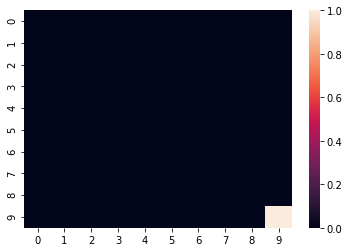

In [55]:
ax1 = sns.heatmap(reward_funct1)

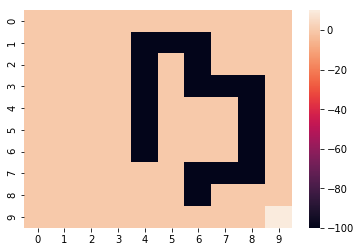

In [56]:
ax2 = sns.heatmap(reward_funct2)

In [57]:
print(reward_funct1[0,0])
print(reward_funct1)

0
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [58]:
w = 0.1

# Transition Probilitiy (Need to add more states conditions under each of 3 categories)
def tp(state, action):
    ###3 corners
    if state == 0:
        #off grid
        if action =="Move Up":
            s0up={10:w/4, 
                  1:w/4, 
                  0:1-w+w/4+w/4}
            return s0up
        elif action =="Move Left":
            s0left={10:w/4,
                    1:w/4,
                    0:1-w+w/4+w/4}
            return s0left
        #on grid
        elif action=="Move Down":
            s0down={1:1-w+w/4,
                    10:w/4,
                    0:w/2}
            return s0down
        elif action =="Move Right":
            s0right={10:1-w+w/4,
                     1:w/4,
                     0:w/2}
            return s0right
        else:
            return None
    elif state== 90:
        #off grid
        if action =="Move Right":
            s90right={80:w/4,
                      91:w/4,
                      90:1-w+w/4+w/4}
            return s90right
        elif action=="Move Up":
            s90up={80:w/4,
                   91:w/4,
                   90:1-w+w/4+w/4}
            return s90up
        #on grid
        elif action =="Move Left":
            s90left={80:1-w+w/4,
                     91:w/4,
                     90:w/2}
            return s90left
        elif action=="Move Down":
            s90down={91:1-w+w/4,
                     80:w/4,
                     90:w/2}
            return s90down
        else:
            return None
    elif state==9:
        #off grid
        if action =="Move Left":
            s9left={8:w/4,
                    19:w/4,
                    9:1-w+w/4+w/4}
            return s9left
        elif action=="Move Down":
            s9down={8:w/4,
                    19:w/4,
                    9:1-w+w/4+w/4}
            return s9down
        #on grid
        elif action =="Move Up":
            s9up={8:1-w+w/4,
                  19:w/4,
                  9:w/2}
            return s9up
        elif action=="Move Right":
            s9right={19:1-w+w/4,
                     8:w/4,
                     9:w/2}
            return s9right
        else:
            return None
    elif state==99:
        #off grid
        if action =="Move Right":
            s99right={98:w/4,
                      89:w/4,
                      99:1-w+w/4+w/4}
            return s99right
        elif action=="Move Down":
            s99down={98:w/4,
                     89:w/4,
                     99:1-w+w/4+w/4}
            return s99down
        #on grid
        elif action =="Move Up":
            s99up={98:1-w+w/4,
                   89:w/4,
                   99:w/2}
            return s99up
        elif action=="Move Left":
            s99left={89:1-w+w/4,
                     98:w/4,
                     99:w/2}
            return s99left
        else:
            return None
    elif state in np.arange(1, 9):
        #off grid
        if action=="Move Left":
            slleft={state:1-w+w/4,
                    state-1:w/4,
                    state+1:w/4,
                    state+10:w/4}
            return slleft
        #on grid
        elif action=="Move Up":
            slup={state:w/4,
                  state-1:1-w+w/4,
                  state+1:w/4,
                  state+10:w/4}
            return slup
        elif action=="Move Right":
            slright={state:w/4,
                     state-1:w/4,
                     state+1:w/4,
                     state+10:1-w+w/4}
            return slright
        elif action=="Move Down":
            sldown={state:w/4,
                    state-1:w/4,
                    state+1:1-w+w/4,
                    state+10:w/4}
            return sldown
        else:
            return None
    elif state in np.arange(91, 99):
        #off grid
        if action=="Move Right":
            srright={state:1-w+w/4,
                     state-1:w/4,
                     state+1:w/4,
                     state-10:w/4}
            return srright
        #on grid
        elif action=="Move Up":
            srup={state:w/4,
                  state-1:1-w+w/4,
                  state+1:w/4,
                  state-10:w/4}
            return srup
        elif action=="Move Left":
            srleft={state:w/4,
                    state-1:w/4,
                    state+1:w/4,
                    state-10:1-w+w/4}
            return srleft
        elif action=="Move Down":
            srdown={state:w/4,
                    state-1:w/4,
                    state+1:1-w+w/4,
                    state-10:w/4}
            return srdown
        else:
            return None
    elif state in np.arange(10, 90, 10):
        #off grid
        if action=="Move Up":
            suup={state:1-w+w/4,
                  state+1:w/4,
                  state+10:w/4,
                  state-10:w/4}
            return suup
        #on grid
        elif action=="Move Left":
            suleft={state:w/4,
                    state+1:w/4,
                    state+10:w/4,
                    state-10:1-w+w/4}
            return suleft
        elif action=="Move Right":
            suright={state:w/4,
                     state+1:w/4,
                     state+10:1-w+w/4,
                     state-10:w/4}
            return suright
        elif action=="Move Down":
            sudown={state:w/4,
                    state+1:1-w+w/4,
                    state+10:w/4,
                    state-10:w/4}
            return sudown
        else:
            return None
    elif state in np.arange(19, 99, 10):
        #off grid
        if action=="Move Down":
            sddown={state:1-w+w/4,
                    state-1:w/4,
                    state+10:w/4,
                    state-10:w/4}
            return sddown
        #on grid
        elif action=="Move Left":
            sdleft={state:w/4,
                    state-1:w/4,
                    state+10:w/4,
                    state-10:1-w+w/4}
            return sdleft
        elif action=="Move Right":
            sdright={state:w/4,
                     state-1:w/4,
                     state+10:1-w+w/4,
                     state-10:w/4}
            return sdright
        elif action=="Move Up":
            sdup={state:w/4,
                  state-1:1-w+w/4,
                  state+10:w/4,
                  state-10:w/4}
            return sdup
        else:
            return None
    else:
        if action=="Move Down":
            scdown={state+1:1-w+w/4,
                    state-1:w/4,
                    state+10:w/4,
                    state-10:w/4}
            return scdown
        elif action=="Move Left":
            scleft={state+1:w/4,
                    state-1:w/4,
                    state+10:w/4,
                    state-10:1-w+w/4}
            return scleft
        elif action=="Move Right":
            scright={state+1:w/4,
                     state-1:w/4,
                     state+10:1-w+w/4,
                     state-10:w/4}
            return scright
        elif action=="Move Up":
            scup={state+1:w/4,
                  state-1:1-w+w/4,
                  state+10:w/4,
                  state-10:w/4}
            return scup
        else:
            return None
        
      

In [59]:
# Set state (0-99)

ss=np.zeros(shape=(10,10))
#print(ss)
for i in range(0,10):
    ss[i,0]=i
    ss[i,1]=i+10
    ss[i,2]=i+20
    ss[i,3]=i+30
    ss[i,4]=i+40
    ss[i,5]=i+50
    ss[i,6]=i+60
    ss[i,7]=i+70
    ss[i,8]=i+80
    ss[i,9]=i+90
print(ss)
print(type(ss))
print(ss.size)

[[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90.]
 [  1.  11.  21.  31.  41.  51.  61.  71.  81.  91.]
 [  2.  12.  22.  32.  42.  52.  62.  72.  82.  92.]
 [  3.  13.  23.  33.  43.  53.  63.  73.  83.  93.]
 [  4.  14.  24.  34.  44.  54.  64.  74.  84.  94.]
 [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95.]
 [  6.  16.  26.  36.  46.  56.  66.  76.  86.  96.]
 [  7.  17.  27.  37.  47.  57.  67.  77.  87.  97.]
 [  8.  18.  28.  38.  48.  58.  68.  78.  88.  98.]
 [  9.  19.  29.  39.  49.  59.  69.  79.  89.  99.]]
<type 'numpy.ndarray'>
100


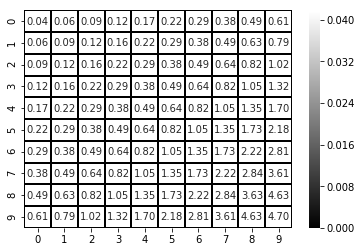

In [60]:
## Question 2 - 5
import random

states = ss
rewards = reward_funct1
actions = ["Move Up", "Move Down", "Move Right", "Move Left"]
gamma = 0.8
epsilon = 0.01

# Value iteration algorithm that output both optimal values and optimal policy
def policy_iteration(states, rewards, actions, gamma, epsilon):
    V = {s: 0 for s in np.arange(states.size)}
    pi = {s:random.choice(actions) for s in np.arange(states.size)}
    #print(pi)
    delta = 10
    while delta > epsilon:
        delta = 0
        for s in np.arange(states.size):
            v_old = V[s]
            V_temp = np.array([])
            for a in actions:
                V_temp = np.append(V_temp, (sum(tp(s,a)[s1]*(rewards[s1%10,s1/10] + gamma * V[s1])
                       for s1 in tp(s,a))))
            pi[s] = actions[np.argmax(V_temp)]
            V[s] = max(V_temp)
            delta = max(delta, abs(v_old - V[s]))    
    return V, pi
         
Vi, Pi = policy_iteration(states, rewards, actions, gamma, epsilon)

# Save optimal values(dictionary-type) to an ndarray
vgrid=np.zeros(shape=(10,10))
for c in np.arange(10):
    for r in np.arange(10):
        vgrid[r, c] = Vi[r+c*10]

# Represent actions as arrows
def arrows(policy):
    arrow_dic = {'Move Up': '^',
                'Move Down': 'V',
                'Move Right': '>',
                'Move Left': '<'}
    return {s: arrow_dic[a] for (s,a) in policy.items()}

pi_arrow = arrows(Pi)

# Save optimal policy(dictionary-type) to an ndarray
pgrid=np.chararray((10,10), itemsize=4)
for c in np.arange(10):
    for r in np.arange(10):
        pgrid[r, c] = pi_arrow[r+c*10]

pgrid_e = pgrid

#fig=pl
ax1 = sns.heatmap(vgrid, annot=True, fmt=".2f", linewidths=1, linecolor="black", cmap='gray', vmax=0.0)
#ax1 = sns.heatmap(vgrid, annot=True, fmt=".2f", linewidths=1, linecolor="black")

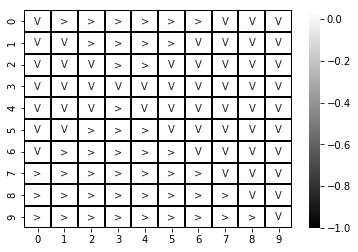

In [61]:
ax2 = sns.heatmap(vgrid, annot=pgrid, fmt="s", linewidths=1, linecolor="black", cmap='gray', vmax=-1)

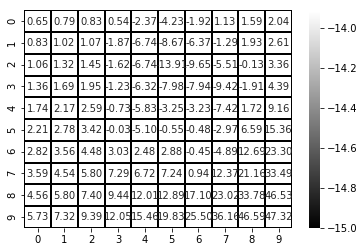

In [62]:
## Question 6 - 9

rewards = reward_funct2

# Recompute new optimal values and policy with reward function 2
Vi, Pi = policy_iteration(states, rewards, actions, gamma, epsilon)

vgrid=np.zeros(shape=(10,10))
for c in np.arange(10):
    for r in np.arange(10):
        vgrid[r, c] = Vi[r+c*10]

pi_arrow = arrows(Pi)

pgrid=np.chararray((10,10), itemsize=4)
for c in np.arange(10):
    for r in np.arange(10):
        pgrid[r, c] = pi_arrow[r+c*10]

#pgrid_e = pgrid        

ax1 = sns.heatmap(vgrid, annot=True, fmt=".2f", linewidths=1, linecolor="black", cmap='gray', vmax=-15)
#ax1 = sns.heatmap(vgrid, annot=True, fmt=".2f", linewidths=1, linecolor="black")

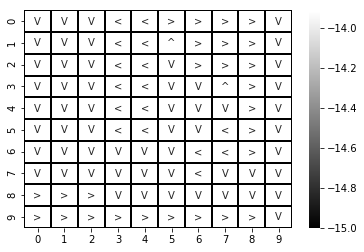

In [63]:
ax2 = sns.heatmap(vgrid, annot=pgrid, fmt="s", linewidths=1, linecolor="black", cmap='gray', vmax=-15)

In [64]:
Pa1 = np.zeros(shape=(100,100))
Pa = np.zeros(shape=(100,100))
P=np.zeros(shape=(4,100,100))
I_S = np.identity(100)

for i in range(0,100):
    Action=Pi[i]
    a = tp(i, Action)
    b = a.values()
    c = a.keys()
    for j in range(0,len(c)):        
        Pa1[i, c[j]] = b[j]
        Pa[i, c[j]] = 1 - Pa1[i, c[j]]

act=["Move Up","Move Down","Move Left","Move Right"]
print(act[0])
for i in range(0,4):
    
    for j in range(0,100):
        
        a1=tp(j,act[i])
        b1=a1.values()
        c1=a1.keys()
        for k in range(0,len(c1)):
            P[i,j,c1[k]]=b1[k]

#print(Pa1)
#print(Pa)
#print(I_S)
print(P)

Move Up
[[[ 0.95   0.025  0.    ...,  0.     0.     0.   ]
  [ 0.925  0.025  0.025 ...,  0.     0.     0.   ]
  [ 0.     0.925  0.025 ...,  0.     0.     0.   ]
  ..., 
  [ 0.     0.     0.    ...,  0.025  0.025  0.   ]
  [ 0.     0.     0.    ...,  0.925  0.025  0.025]
  [ 0.     0.     0.    ...,  0.     0.925  0.05 ]]

 [[ 0.05   0.925  0.    ...,  0.     0.     0.   ]
  [ 0.025  0.025  0.925 ...,  0.     0.     0.   ]
  [ 0.     0.025  0.025 ...,  0.     0.     0.   ]
  ..., 
  [ 0.     0.     0.    ...,  0.025  0.925  0.   ]
  [ 0.     0.     0.    ...,  0.025  0.025  0.925]
  [ 0.     0.     0.    ...,  0.     0.025  0.95 ]]

 [[ 0.95   0.025  0.    ...,  0.     0.     0.   ]
  [ 0.025  0.925  0.025 ...,  0.     0.     0.   ]
  [ 0.     0.025  0.925 ...,  0.     0.     0.   ]
  ..., 
  [ 0.     0.     0.    ...,  0.025  0.025  0.   ]
  [ 0.     0.     0.    ...,  0.025  0.025  0.025]
  [ 0.     0.     0.    ...,  0.     0.025  0.05 ]]

 [[ 0.05   0.025  0.    ...,  0.     0.     

In [95]:
def irl(n_states, n_actions, transition_probability, policy, discount, Rmax,
        l1):
    A = set(range(n_actions))  

    def T(a, s):

        return np.dot(transition_probability[policy[s], s] -
                      transition_probability[a, s],
                      np.linalg.inv(np.eye(n_states) -
                        discount*transition_probability[policy[s]]))
    
    c = -np.hstack([np.zeros(n_states), np.ones(n_states),
                    -l1*np.ones(n_states)])
    zero_stack1 = np.zeros((n_states*(n_actions-1), n_states))
    T_stack = np.vstack([
        -T(a, s)
        for s in range(n_states)
        for a in A - {policy[s]}
    ])
    I_stack1 = np.vstack([
        np.eye(1, n_states, s)
        for s in range(n_states)
        for a in A - {policy[s]}
    ])
    I_stack2 = np.eye(n_states)
    zero_stack2 = np.zeros((n_states, n_states))

    D_left = np.vstack([T_stack, T_stack, -I_stack2, I_stack2])
    D_middle = np.vstack([I_stack1, zero_stack1, zero_stack2, zero_stack2])
    D_right = np.vstack([zero_stack1, zero_stack1, -I_stack2, -I_stack2])

    D = np.hstack([D_left, D_middle, D_right])
    b = np.zeros((n_states*(n_actions-1)*2 + 2*n_states, 1))
    bounds = np.array([(None, None)]*2*n_states + [(-Rmax, Rmax)]*n_states)

    D_bounds = np.hstack([
        np.vstack([
            -np.eye(n_states),
            np.eye(n_states)]),
        np.vstack([
            np.zeros((n_states, n_states)),
            np.zeros((n_states, n_states))]),
        np.vstack([
            np.zeros((n_states, n_states)),
            np.zeros((n_states, n_states))])])
    b_bounds = np.vstack([Rmax*np.ones((n_states, 1))]*2)
    D = np.vstack((D, D_bounds))
    b = np.vstack((b, b_bounds))
    A_ub = matrix(D)
    b = matrix(b)
    c = matrix(c)
    results = solvers.lp(c, A_ub, b)
    r = np.asarray(results["x"][:n_states], dtype=np.double)

    return r.reshape((n_states,))

In [96]:
def tonumbers(policy):
    arrow_dic = {'Move Up': 0,
                'Move Down': 1,
                'Move Right': 2,
                'Move Left': 3}
    return {s: arrow_dic[a] for (s,a) in policy.items()}

Pi_num=tonumbers(Pi) # Convert strings to 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.5072e+00 -6.4187e+01  2e+02  5e-01  3e+00  1e+00
 2: -5.2250e+00 -5.3039e+01  2e+02  4e-01  2e+00  9e-01
 3: -8.8665e+00 -4.4006e+01  1e+02  3e-01  2e+00  6e-01
 4: -8.7582e+00 -3.1377e+01  8e+01  2e-01  1e+00  2e-01
 5: -1.4429e+01 -1.9816e+01  2e+01  4e-02  3e-01  5e-02
 6: -1.5532e+01 -1.7212e+01  5e+00  1e-02  9e-02  1e-02
 7: -1.5847e+01 -1.6628e+01  2e+00  6e-03  4e-02  5e-03
 8: -1.6018e+01 -1.6316e+01  9e-01  2e-03  2e-02  1e-03
 9: -1.6106e+01 -1.6227e+01  4e-01  1e-03  6e-03  5e-04
10: -1.6136e+01 -1.6187e+01  2e-01  4e-04  3e-03  2e-04
11: -1.6139e+01 -1.6184e+01  1e-01  4e-04  2e-03  2e-04
12: -1.6148e+01 -1.6171e+01  7e-02  2e-04  1e-03  8e-05
13: -1.6153e+01 -1.6164e+01  3e-02  8e-05  5e-04  3e-05
14: -1.6155e+01 -1.6160e+01  2e-02  4e-05  3e-04  2e-05
15: -1.6156e+01 -1.6159e+01  8e-03  2e-05  1e-04  9e-06
16: -1.6156e+01 -1.6157e+01  3e-03  8e-06  5e-05  

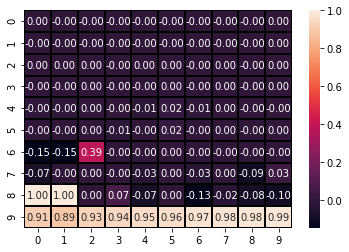

In [97]:
rf1 = irl(100,4, P,Pi_num,gamma, 1,0.8)
#print(rf1.size)
#print(rf1)

def rf2grid(rfarray):
    rfgrid=np.zeros(shape=(10,10))
    for c in np.arange(10):
        for r in np.arange(10):
            rfgrid[r, c] = rfarray[r+c*10]
    return rfgrid

rf1 = rf2grid(rf1)
#print(rf1)
#print(rf1[:,0])
sns.heatmap(rf1, annot=True, fmt=".2f", linewidths=1, linecolor="black")

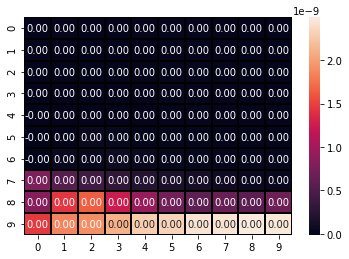

In [26]:
rewards = rf1

# Recompute new optimal values and policy with reward function 2
Vi_a, Pi_a = policy_iteration(states, rewards, actions, gamma, epsilon)

vgrid_a=np.zeros(shape=(10,10))
for c in np.arange(10):
    for r in np.arange(10):
        vgrid_a[r, c] = Vi_a[r+c*10]

pi_arrow = arrows(Pi_a)

pgrid_a=np.chararray((10,10), itemsize=4)
for c in np.arange(10):
    for r in np.arange(10):
        pgrid_a[r, c] = pi_arrow[r+c*10]

#print(vgrid)
#print(pgrid)
ax1_a = sns.heatmap(vzgrid_a, annot=True, fmt=".2f", linewidths=1, linecolor="black")

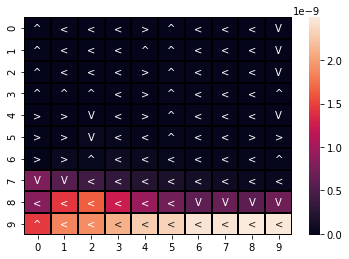

In [27]:
ax2_a = sns.heatmap(vgrid_a, annot=pgrid_a, fmt="s", linewidths=1, linecolor="black")


In [28]:
print(pgrid_a)
print(pgrid_e)

m=np.zeros(shape=(10,10))
for c in np.arange(10):
    for r in np.arange(10):
        if pgrid_a[r, c] == pgrid_e[r, c]:
            m[r, c] = 1
            
Accuracy = np.count_nonzero(m)/(m.size * 1.0)
print(Accuracy)

[['^' '<' '<' '<' '>' '^' '<' '<' '<' 'V']
 ['^' '<' '<' '<' '^' '^' '<' '<' '<' 'V']
 ['^' '<' '<' '<' '>' '^' '<' '<' '<' 'V']
 ['^' '^' '^' '<' '>' '^' '<' '<' '<' '^']
 ['>' '>' 'V' '<' '>' '^' '<' '<' '<' 'V']
 ['>' '>' 'V' '<' '<' '^' '<' '<' '>' '>']
 ['>' '>' '^' '<' '<' '<' '<' '<' '<' '^']
 ['V' 'V' '<' '<' '<' '<' '<' '<' '<' '<']
 ['<' '<' '<' '<' '<' '<' 'V' 'V' 'V' 'V']
 ['^' '<' '<' '<' '<' '<' '<' '<' '<' '<']]
[['V' '>' '>' '>' '>' '>' '>' 'V' 'V' 'V']
 ['V' 'V' '>' '>' '>' '>' 'V' 'V' 'V' 'V']
 ['V' 'V' 'V' '>' '>' 'V' 'V' 'V' 'V' 'V']
 ['V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V']
 ['V' 'V' 'V' '>' 'V' 'V' 'V' 'V' 'V' 'V']
 ['V' 'V' '>' '>' '>' 'V' 'V' 'V' 'V' 'V']
 ['V' '>' '>' '>' '>' '>' 'V' 'V' 'V' 'V']
 ['>' '>' '>' '>' '>' '>' '>' 'V' 'V' 'V']
 ['>' '>' '>' '>' '>' '>' '>' '>' 'V' 'V']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' 'V']]
0.1


In [38]:
lam= [float(x)/100 for x in range(0,500,1)]
print(lam)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

In [46]:
acc=[]
#acc=np.zeros(shape=(1,500))
def accuracy(lam):
    for i in range(0,500):
        sen1 = irl(100,4, P,Pi_num,gamma, 1,lam[i])
        sen1=rf2grid(sen1)
        rewards = sen1
        Vi_a, Pi_a = policy_iteration(states, rewards, actions, gamma, epsilon)

        vgrid_a=np.zeros(shape=(10,10))
        for c in np.arange(10):
            for r in np.arange(10):
                vgrid_a[r, c] = Vi_a[r+c*10]

        pi_arrow = arrows(Pi_a)

        pgrid_a=np.chararray((10,10), itemsize=4)
        for c in np.arange(10):
            for r in np.arange(10):
                pgrid_a[r, c] = pi_arrow[r+c*10]
        
        m=np.zeros(shape=(10,10))
        for c in np.arange(10):
            for r in np.arange(10):
                if pgrid_a[r, c] == pgrid_e[r, c]:
                    m[r, c] = 1

        Accuracy = np.count_nonzero(m)/(m.size * 1.0)
        #acc[i]=Accuracy
        acc.append(Accuracy)
        #print(Accuracy)


accuracy(lam)
max(acc)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.2673e+01 -8.5730e+01  3e+02  6e-01  5e+00  1e+00
 2: -2.5601e+01 -8.2162e+01  3e+02  5e-01  4e+00  9e-01
 3: -2.6204e+01 -7.9096e+01  3e+02  4e-01  3e+00  8e-01
 4: -3.7612e+01 -5.7471e+01  1e+02  2e-01  1e+00  3e-01
 5: -4.4910e+01 -5.4359e+01  5e+01  8e-02  6e-01  1e-01
 6: -4.7942e+01 -5.3444e+01  3e+01  4e-02  4e-01  6e-02
 7: -4.9499e+01 -5.2683e+01  2e+01  3e-02  2e-01  3e-02
 8: -4.9831e+01 -5.1865e+01  1e+01  2e-02  1e-01  2e-02
 9: -5.0716e+01 -5.1722e+01  5e+00  8e-03  7e-02  5e-03
10: -5.1093e+01 -5.1577e+01  3e+00  4e-03  3e-02  3e-03
11: -5.1295e+01 -5.1501e+01  1e+00  2e-03  1e-02  1e-03
12: -5.1399e+01 -5.1463e+01  3e-01  5e-04  4e-03  3e-04
13: -5.1426e+01 -5.1449e+01  1e-01  2e-04  1e-03  1e-04
14: -5.1435e+01 -5.1443e+01  4e-02  6e-05  5e-04  4e-05
15: -5.1438e+01 -5.1441e+01  2e-02  2e-05  2e-04  2e-05
16: -5.1440e+01 -5.1440e+01  2e-03  2e-06  2e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -9.6342e+00 -7.9174e+01  3e+02  6e-01  5e+00  1e+00
 2: -2.1268e+01 -7.5794e+01  3e+02  4e-01  4e+00  9e-01
 3: -2.1307e+01 -7.2462e+01  2e+02  4e-01  3e+00  8e-01
 4: -3.1108e+01 -5.0864e+01  9e+01  2e-01  1e+00  3e-01
 5: -3.7227e+01 -4.7774e+01  5e+01  8e-02  7e-01  1e-01
 6: -4.1772e+01 -4.6459e+01  2e+01  4e-02  3e-01  5e-02
 7: -4.2468e+01 -4.6014e+01  2e+01  3e-02  2e-01  4e-02
 8: -4.3676e+01 -4.5708e+01  9e+00  2e-02  1e-01  2e-02
 9: -4.3855e+01 -4.5197e+01  6e+00  1e-02  9e-02  9e-03
10: -4.4450e+01 -4.5166e+01  3e+00  6e-03  5e-02  5e-03
11: -4.4582e+01 -4.5130e+01  2e+00  4e-03  4e-02  3e-03
12: -4.4660e+01 -4.5141e+01  2e+00  4e-03  3e-02  3e-03
13: -4.4950e+01 -4.5111e+01  7e-01  1e-03  1e-02  9e-04
14: -4.5039e+01 -4.5110e+01  3e-01  6e-04  5e-03  4e-04
15: -4.5078e+01 -4.5106e+01  1e-01  2e-04  2e-03  1e-04
16: -4.5089e+01 -4.5104e+01  7e-02  1e-04  1e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -7.3445e+00 -7.4135e+01  3e+02  5e-01  4e+00  1e+00
 2: -1.8019e+01 -7.0891e+01  2e+02  4e-01  3e+00  9e-01
 3: -1.7794e+01 -6.7512e+01  2e+02  4e-01  3e+00  7e-01
 4: -2.6703e+01 -4.5629e+01  8e+01  2e-01  1e+00  3e-01
 5: -3.2360e+01 -4.1775e+01  4e+01  8e-02  6e-01  1e-01
 6: -3.5864e+01 -4.0267e+01  2e+01  4e-02  3e-01  5e-02
 7: -3.6793e+01 -3.9793e+01  1e+01  2e-02  2e-01  3e-02
 8: -3.7084e+01 -3.9452e+01  1e+01  2e-02  2e-01  2e-02
 9: -3.8108e+01 -3.9132e+01  5e+00  8e-03  7e-02  9e-03
10: -3.8153e+01 -3.8943e+01  4e+00  6e-03  5e-02  5e-03
11: -3.8570e+01 -3.8892e+01  1e+00  3e-03  2e-02  2e-03
12: -3.8721e+01 -3.8864e+01  6e-01  1e-03  9e-03  9e-04
13: -3.8788e+01 -3.8852e+01  3e-01  5e-04  4e-03  3e-04
14: -3.8826e+01 -3.8850e+01  1e-01  2e-04  2e-03  1e-04
15: -3.8844e+01 -3.8848e+01  2e-02  3e-05  3e-04  2e-05
16: -3.8844e+01 -3.8848e+01  2e-02  3e-05  3e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -5.7250e+00 -7.0758e+01  2e+02  5e-01  4e+00  1e+00
 2: -1.5496e+01 -6.7485e+01  2e+02  4e-01  3e+00  9e-01
 3: -1.5140e+01 -6.3879e+01  2e+02  4e-01  3e+00  8e-01
 4: -2.3785e+01 -4.1234e+01  7e+01  1e-01  1e+00  2e-01
 5: -2.8116e+01 -3.6301e+01  4e+01  7e-02  5e-01  1e-01
 6: -3.0180e+01 -3.4683e+01  2e+01  4e-02  3e-01  5e-02
 7: -3.1599e+01 -3.3801e+01  1e+01  2e-02  1e-01  2e-02
 8: -3.2354e+01 -3.3260e+01  4e+00  7e-03  6e-02  9e-03
 9: -3.2485e+01 -3.3067e+01  3e+00  5e-03  4e-02  4e-03
10: -3.2764e+01 -3.2978e+01  9e-01  2e-03  1e-02  1e-03
11: -3.2874e+01 -3.2950e+01  3e-01  6e-04  5e-03  5e-04
12: -3.2920e+01 -3.2934e+01  6e-02  1e-04  9e-04  6e-05
13: -3.2931e+01 -3.2932e+01  7e-03  1e-05  1e-04  7e-06
14: -3.2932e+01 -3.2932e+01  1e-03  2e-06  1e-05  1e-06
15: -3.2932e+01 -3.2932e+01  3e-04  5e-07  4e-06  3e-07
16: -3.2932e+01 -3.2932e+01  9e-05  2e-07  1e-06  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -4.3413e+00 -6.7550e+01  2e+02  5e-01  4e+00  1e+00
 2: -1.3197e+01 -6.4321e+01  2e+02  4e-01  3e+00  9e-01
 3: -1.2868e+01 -6.0089e+01  2e+02  4e-01  3e+00  7e-01
 4: -2.1540e+01 -3.7457e+01  6e+01  1e-01  1e+00  2e-01
 5: -2.4555e+01 -3.0027e+01  2e+01  4e-02  3e-01  7e-02
 6: -2.6153e+01 -2.8742e+01  1e+01  2e-02  2e-01  3e-02
 7: -2.6838e+01 -2.8137e+01  5e+00  1e-02  8e-02  1e-02
 8: -2.7243e+01 -2.7833e+01  2e+00  5e-03  4e-02  5e-03
 9: -2.7521e+01 -2.7658e+01  6e-01  1e-03  9e-03  9e-04
10: -2.7587e+01 -2.7625e+01  2e-01  3e-04  2e-03  2e-04
11: -2.7611e+01 -2.7617e+01  3e-02  5e-05  4e-04  3e-05
12: -2.7614e+01 -2.7616e+01  8e-03  2e-05  1e-04  9e-06
13: -2.7616e+01 -2.7616e+01  1e-03  2e-06  2e-05  1e-06
14: -2.7616e+01 -2.7616e+01  4e-05  8e-08  6e-07  4e-08
15: -2.7616e+01 -2.7616e+01  4e-07  8e-10  6e-09  4e-10
Optimal solution found.
     pcost       dcost    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -3.2492e+00 -6.4590e+01  2e+02  5e-01  4e+00  1e+00
 2: -1.1300e+01 -6.1352e+01  2e+02  4e-01  3e+00  9e-01
 3: -1.1042e+01 -5.7130e+01  2e+02  4e-01  3e+00  8e-01
 4: -1.8984e+01 -3.6032e+01  7e+01  1e-01  1e+00  3e-01
 5: -2.1262e+01 -2.7284e+01  2e+01  5e-02  4e-01  8e-02
 6: -2.1780e+01 -2.5190e+01  1e+01  3e-02  2e-01  4e-02
 7: -2.2545e+01 -2.3996e+01  5e+00  1e-02  9e-02  2e-02
 8: -2.2889e+01 -2.3489e+01  2e+00  5e-03  4e-02  6e-03
 9: -2.3032e+01 -2.3271e+01  9e-01  2e-03  1e-02  2e-03
10: -2.3107e+01 -2.3201e+01  4e-01  7e-04  6e-03  6e-04
11: -2.3140e+01 -2.3176e+01  1e-01  3e-04  2e-03  2e-04
12: -2.3155e+01 -2.3165e+01  4e-02  8e-05  6e-04  5e-05
13: -2.3160e+01 -2.3162e+01  8e-03  2e-05  1e-04  1e-05
14: -2.3161e+01 -2.3161e+01  2e-03  4e-06  3e-05  2e-06
15: -2.3161e+01 -2.3161e+01  7e-05  2e-07  1e-06  7e-08
16: -2.3161e+01 -2.3161e+01  7e-07  2e-09  1e-08  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -2.5913e+00 -6.2398e+01  2e+02  5e-01  4e+00  1e+00
 2: -1.0107e+01 -5.9079e+01  2e+02  4e-01  3e+00  9e-01
 3: -9.8414e+00 -5.5671e+01  2e+02  4e-01  3e+00  8e-01
 4: -1.7170e+01 -3.4952e+01  7e+01  1e-01  1e+00  3e-01
 5: -1.9400e+01 -2.5477e+01  2e+01  5e-02  4e-01  8e-02
 6: -2.0132e+01 -2.2646e+01  8e+00  2e-02  1e-01  2e-02
 7: -2.0683e+01 -2.1634e+01  3e+00  8e-03  6e-02  8e-03
 8: -2.0789e+01 -2.1297e+01  2e+00  4e-03  3e-02  3e-03
 9: -2.0869e+01 -2.1193e+01  1e+00  3e-03  2e-02  2e-03
10: -2.0886e+01 -2.1153e+01  8e-01  2e-03  2e-02  1e-03
11: -2.0956e+01 -2.1054e+01  3e-01  8e-04  6e-03  4e-04
12: -2.0980e+01 -2.1013e+01  1e-01  3e-04  2e-03  1e-04
13: -2.0988e+01 -2.0999e+01  4e-02  9e-05  7e-04  4e-05
14: -2.0991e+01 -2.0995e+01  1e-02  3e-05  3e-04  1e-05
15: -2.0992e+01 -2.0993e+01  3e-03  7e-06  5e-05  3e-06
16: -2.0992e+01 -2.0992e+01  2e-04  6e-07  4e-06  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -2.1507e+00 -6.0514e+01  2e+02  5e-01  3e+00  1e+00
 2: -8.6411e+00 -5.7355e+01  2e+02  4e-01  3e+00  9e-01
 3: -9.7044e+00 -4.6782e+01  1e+02  3e-01  2e+00  5e-01
 4: -1.5118e+01 -3.2689e+01  6e+01  1e-01  1e+00  2e-01
 5: -1.8097e+01 -2.4124e+01  2e+01  5e-02  3e-01  7e-02
 6: -1.8737e+01 -2.1778e+01  1e+01  2e-02  2e-01  3e-02
 7: -1.9368e+01 -2.0410e+01  3e+00  8e-03  6e-02  9e-03
 8: -1.9471e+01 -2.0066e+01  2e+00  5e-03  3e-02  4e-03
 9: -1.9531e+01 -1.9930e+01  1e+00  3e-03  2e-02  3e-03
10: -1.9619e+01 -1.9799e+01  5e-01  1e-03  1e-02  1e-03
11: -1.9640e+01 -1.9733e+01  3e-01  7e-04  5e-03  3e-04
12: -1.9661e+01 -1.9709e+01  1e-01  4e-04  3e-03  2e-04
13: -1.9670e+01 -1.9701e+01  9e-02  2e-04  2e-03  9e-05
14: -1.9674e+01 -1.9692e+01  5e-02  1e-04  1e-03  5e-05
15: -1.9679e+01 -1.9686e+01  2e-02  5e-05  4e-04  2e-05
16: -1.9680e+01 -1.9684e+01  1e-02  3e-05  2e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.8959e+00 -5.9050e+01  2e+02  5e-01  3e+00  1e+00
 2: -7.5826e+00 -5.6042e+01  2e+02  4e-01  3e+00  9e-01
 3: -1.0430e+01 -4.4013e+01  1e+02  3e-01  2e+00  5e-01
 4: -1.6375e+01 -2.6272e+01  3e+01  8e-02  6e-01  1e-01
 5: -1.7444e+01 -2.0979e+01  1e+01  3e-02  2e-01  3e-02
 6: -1.8162e+01 -1.9595e+01  4e+00  1e-02  8e-02  1e-02
 7: -1.8421e+01 -1.9164e+01  2e+00  6e-03  4e-02  5e-03
 8: -1.8555e+01 -1.8891e+01  1e+00  3e-03  2e-02  2e-03
 9: -1.8628e+01 -1.8795e+01  5e-01  1e-03  9e-03  7e-04
10: -1.8659e+01 -1.8746e+01  3e-01  7e-04  5e-03  3e-04
11: -1.8676e+01 -1.8727e+01  2e-01  4e-04  3e-03  2e-04
12: -1.8682e+01 -1.8714e+01  9e-02  3e-04  2e-03  1e-04
13: -1.8690e+01 -1.8705e+01  4e-02  1e-04  8e-04  5e-05
14: -1.8692e+01 -1.8700e+01  2e-02  6e-05  4e-04  2e-05
15: -1.8694e+01 -1.8696e+01  6e-03  2e-05  1e-04  6e-06
16: -1.8694e+01 -1.8696e+01  5e-03  1e-05  1e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.7144e+00 -5.9490e+01  2e+02  5e-01  3e+00  1e+00
 2: -6.7196e+00 -5.4751e+01  2e+02  4e-01  3e+00  9e-01
 3: -1.1473e+01 -4.0569e+01  1e+02  2e-01  2e+00  4e-01
 4: -1.5072e+01 -2.6587e+01  4e+01  9e-02  6e-01  1e-01
 5: -1.6213e+01 -2.0305e+01  1e+01  3e-02  2e-01  3e-02
 6: -1.7072e+01 -1.8712e+01  5e+00  1e-02  9e-02  1e-02
 7: -1.7472e+01 -1.8147e+01  2e+00  5e-03  4e-02  4e-03
 8: -1.7549e+01 -1.7950e+01  1e+00  3e-03  2e-02  2e-03
 9: -1.7667e+01 -1.7825e+01  5e-01  1e-03  9e-03  6e-04
10: -1.7703e+01 -1.7785e+01  2e-01  7e-04  4e-03  3e-04
11: -1.7719e+01 -1.7763e+01  1e-01  3e-04  2e-03  2e-04
12: -1.7730e+01 -1.7749e+01  5e-02  1e-04  1e-03  6e-05
13: -1.7733e+01 -1.7744e+01  3e-02  9e-05  6e-04  4e-05
14: -1.7735e+01 -1.7742e+01  2e-02  6e-05  4e-04  2e-05
15: -1.7736e+01 -1.7741e+01  2e-02  4e-05  3e-04  2e-05
16: -1.7737e+01 -1.7739e+01  5e-03  1e-05  8e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.5800e+00 -6.2024e+01  2e+02  5e-01  3e+00  1e+00
 2: -6.0111e+00 -5.3265e+01  2e+02  4e-01  3e+00  9e-01
 3: -9.7774e+00 -4.3469e+01  1e+02  3e-01  2e+00  6e-01
 4: -1.1917e+01 -2.6346e+01  5e+01  1e-01  8e-01  2e-01
 5: -1.5149e+01 -1.9456e+01  1e+01  3e-02  2e-01  3e-02
 6: -1.6100e+01 -1.7766e+01  5e+00  1e-02  9e-02  1e-02
 7: -1.6518e+01 -1.7205e+01  2e+00  5e-03  4e-02  4e-03
 8: -1.6661e+01 -1.6955e+01  9e-01  2e-03  2e-02  1e-03
 9: -1.6749e+01 -1.6885e+01  4e-01  1e-03  7e-03  5e-04
10: -1.6788e+01 -1.6846e+01  2e-01  5e-04  3e-03  2e-04
11: -1.6803e+01 -1.6827e+01  7e-02  2e-04  1e-03  8e-05
12: -1.6807e+01 -1.6820e+01  4e-02  1e-04  7e-04  4e-05
13: -1.6809e+01 -1.6818e+01  2e-02  6e-05  4e-04  3e-05
14: -1.6811e+01 -1.6814e+01  1e-02  3e-05  2e-04  1e-05
15: -1.6811e+01 -1.6813e+01  4e-03  1e-05  7e-05  4e-06
16: -1.6812e+01 -1.6812e+01  2e-03  6e-06  4e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.4818e+00 -6.5107e+01  2e+02  5e-01  3e+00  1e+00
 2: -4.9665e+00 -5.2965e+01  2e+02  4e-01  2e+00  9e-01
 3: -8.6589e+00 -4.3652e+01  1e+02  3e-01  2e+00  6e-01
 4: -8.2245e+00 -3.3237e+01  9e+01  2e-01  1e+00  3e-01
 5: -1.3598e+01 -2.1303e+01  3e+01  6e-02  4e-01  8e-02
 6: -1.5022e+01 -1.7642e+01  8e+00  2e-02  1e-01  3e-02
 7: -1.5437e+01 -1.6574e+01  3e+00  9e-03  6e-02  8e-03
 8: -1.5660e+01 -1.6188e+01  2e+00  4e-03  3e-02  3e-03
 9: -1.5813e+01 -1.6018e+01  6e-01  2e-03  1e-02  1e-03
10: -1.5851e+01 -1.5964e+01  3e-01  9e-04  6e-03  6e-04
11: -1.5873e+01 -1.5926e+01  2e-01  4e-04  3e-03  2e-04
12: -1.5886e+01 -1.5912e+01  8e-02  2e-04  1e-03  9e-05
13: -1.5893e+01 -1.5903e+01  3e-02  8e-05  5e-04  3e-05
14: -1.5895e+01 -1.5899e+01  1e-02  4e-05  2e-04  2e-05
15: -1.5896e+01 -1.5897e+01  5e-03  1e-05  9e-05  6e-06
16: -1.5896e+01 -1.5896e+01  2e-03  5e-06  3e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.4054e+00 -6.8110e+01  2e+02  5e-01  3e+00  1e+00
 2: -4.2507e+00 -5.2612e+01  2e+02  4e-01  2e+00  8e-01
 3: -7.9505e+00 -4.2183e+01  1e+02  3e-01  2e+00  6e-01
 4: -7.2675e+00 -3.5629e+01  1e+02  2e-01  1e+00  4e-01
 5: -1.2221e+01 -2.2598e+01  4e+01  8e-02  5e-01  1e-01
 6: -1.3912e+01 -1.7062e+01  1e+01  3e-02  2e-01  3e-02
 7: -1.4412e+01 -1.5905e+01  5e+00  1e-02  7e-02  1e-02
 8: -1.4780e+01 -1.5313e+01  2e+00  4e-03  3e-02  4e-03
 9: -1.4908e+01 -1.5124e+01  6e-01  2e-03  1e-02  1e-03
10: -1.4961e+01 -1.5035e+01  2e-01  6e-04  4e-03  4e-04
11: -1.4966e+01 -1.5029e+01  2e-01  5e-04  3e-03  3e-04
12: -1.4981e+01 -1.5007e+01  8e-02  2e-04  1e-03  1e-04
13: -1.4987e+01 -1.4996e+01  3e-02  7e-05  4e-04  4e-05
14: -1.4988e+01 -1.4993e+01  2e-02  4e-05  3e-04  2e-05
15: -1.4989e+01 -1.4991e+01  6e-03  2e-05  1e-04  7e-06
16: -1.4989e+01 -1.4989e+01  2e-03  5e-06  3e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.3379e+00 -7.0791e+01  3e+02  6e-01  3e+00  1e+00
 2: -3.6989e+00 -5.2113e+01  2e+02  4e-01  2e+00  8e-01
 3: -7.2989e+00 -4.0223e+01  1e+02  3e-01  2e+00  6e-01
 4: -6.6725e+00 -3.5401e+01  1e+02  2e-01  1e+00  4e-01
 5: -1.1305e+01 -2.2295e+01  4e+01  9e-02  5e-01  1e-01
 6: -1.2978e+01 -1.6228e+01  1e+01  3e-02  2e-01  3e-02
 7: -1.3503e+01 -1.5048e+01  5e+00  1e-02  7e-02  1e-02
 8: -1.3860e+01 -1.4459e+01  2e+00  5e-03  3e-02  4e-03
 9: -1.4009e+01 -1.4240e+01  7e-01  2e-03  1e-02  1e-03
10: -1.4041e+01 -1.4185e+01  4e-01  1e-03  7e-03  7e-04
11: -1.4082e+01 -1.4132e+01  2e-01  4e-04  2e-03  2e-04
12: -1.4091e+01 -1.4111e+01  6e-02  2e-04  9e-04  7e-05
13: -1.4094e+01 -1.4104e+01  3e-02  8e-05  4e-04  3e-05
14: -1.4096e+01 -1.4100e+01  1e-02  4e-05  2e-04  2e-05
15: -1.4097e+01 -1.4098e+01  5e-03  1e-05  8e-05  5e-06
16: -1.4097e+01 -1.4098e+01  3e-03  8e-06  5e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.2789e+00 -7.2847e+01  3e+02  6e-01  3e+00  1e+00
 2: -3.2946e+00 -5.1593e+01  2e+02  4e-01  2e+00  8e-01
 3: -6.7396e+00 -3.8313e+01  1e+02  3e-01  1e+00  5e-01
 4: -6.2081e+00 -3.4386e+01  1e+02  2e-01  1e+00  4e-01
 5: -1.0638e+01 -2.1506e+01  4e+01  9e-02  5e-01  1e-01
 6: -1.2218e+01 -1.5580e+01  1e+01  3e-02  2e-01  3e-02
 7: -1.2750e+01 -1.4217e+01  5e+00  1e-02  7e-02  1e-02
 8: -1.3133e+01 -1.3566e+01  1e+00  3e-03  2e-02  2e-03
 9: -1.3233e+01 -1.3464e+01  7e-01  2e-03  1e-02  9e-04
10: -1.3302e+01 -1.3391e+01  3e-01  7e-04  4e-03  3e-04
11: -1.3322e+01 -1.3359e+01  1e-01  3e-04  2e-03  1e-04
12: -1.3329e+01 -1.3348e+01  6e-02  1e-04  9e-04  6e-05
13: -1.3331e+01 -1.3343e+01  4e-02  1e-04  6e-04  4e-05
14: -1.3333e+01 -1.3341e+01  2e-02  6e-05  4e-04  2e-05
15: -1.3335e+01 -1.3337e+01  8e-03  2e-05  1e-04  8e-06
16: -1.3335e+01 -1.3336e+01  4e-03  1e-05  6e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.2138e+00 -7.4695e+01  3e+02  6e-01  3e+00  1e+00
 2: -2.9292e+00 -5.1010e+01  2e+02  4e-01  2e+00  8e-01
 3: -6.1720e+00 -3.6233e+01  1e+02  2e-01  1e+00  5e-01
 4: -5.7436e+00 -3.2954e+01  1e+02  2e-01  1e+00  4e-01
 5: -1.0044e+01 -2.0392e+01  4e+01  8e-02  5e-01  1e-01
 6: -1.1501e+01 -1.4891e+01  1e+01  3e-02  2e-01  3e-02
 7: -1.1970e+01 -1.3493e+01  5e+00  1e-02  7e-02  1e-02
 8: -1.2276e+01 -1.2924e+01  2e+00  5e-03  3e-02  3e-03
 9: -1.2464e+01 -1.2726e+01  8e-01  2e-03  1e-02  1e-03
10: -1.2536e+01 -1.2641e+01  3e-01  8e-04  5e-03  5e-04
11: -1.2564e+01 -1.2597e+01  1e-01  3e-04  1e-03  1e-04
12: -1.2570e+01 -1.2585e+01  5e-02  1e-04  7e-04  6e-05
13: -1.2572e+01 -1.2582e+01  3e-02  8e-05  4e-04  3e-05
14: -1.2572e+01 -1.2581e+01  3e-02  7e-05  4e-04  3e-05
15: -1.2574e+01 -1.2577e+01  9e-03  2e-05  1e-04  1e-05
16: -1.2574e+01 -1.2577e+01  9e-03  2e-05  1e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.1391e+00 -7.6345e+01  3e+02  6e-01  3e+00  1e+00
 2: -2.5902e+00 -5.0380e+01  2e+02  4e-01  2e+00  7e-01
 3: -5.5963e+00 -3.4000e+01  1e+02  2e-01  1e+00  5e-01
 4: -5.2675e+00 -3.1235e+01  1e+02  2e-01  1e+00  4e-01
 5: -9.5268e+00 -1.8862e+01  3e+01  7e-02  4e-01  1e-01
 6: -1.0835e+01 -1.4029e+01  1e+01  3e-02  1e-01  3e-02
 7: -1.1228e+01 -1.2743e+01  5e+00  1e-02  7e-02  1e-02
 8: -1.1513e+01 -1.2175e+01  2e+00  5e-03  3e-02  3e-03
 9: -1.1693e+01 -1.1980e+01  9e-01  2e-03  1e-02  1e-03
10: -1.1780e+01 -1.1879e+01  3e-01  8e-04  4e-03  4e-04
11: -1.1805e+01 -1.1836e+01  1e-01  2e-04  1e-03  1e-04
12: -1.1809e+01 -1.1826e+01  6e-02  1e-04  8e-04  7e-05
13: -1.1812e+01 -1.1822e+01  3e-02  8e-05  4e-04  3e-05
14: -1.1814e+01 -1.1818e+01  1e-02  4e-05  2e-04  1e-05
15: -1.1814e+01 -1.1817e+01  9e-03  2e-05  1e-04  9e-06
16: -1.1814e+01 -1.1816e+01  4e-03  1e-05  6e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.0526e+00 -7.7808e+01  3e+02  6e-01  3e+00  1e+00
 2: -2.2705e+00 -4.9718e+01  2e+02  4e-01  2e+00  7e-01
 3: -4.8615e+00 -3.2634e+01  1e+02  2e-01  1e+00  4e-01
 4: -5.2179e+00 -2.8515e+01  8e+01  2e-01  1e+00  3e-01
 5: -9.1213e+00 -1.6464e+01  2e+01  6e-02  3e-01  8e-02
 6: -1.0293e+01 -1.2916e+01  8e+00  2e-02  1e-01  3e-02
 7: -1.0576e+01 -1.1925e+01  4e+00  1e-02  6e-02  1e-02
 8: -1.0810e+01 -1.1401e+01  2e+00  5e-03  2e-02  3e-03
 9: -1.0932e+01 -1.1224e+01  9e-01  2e-03  1e-02  1e-03
10: -1.1038e+01 -1.1101e+01  2e-01  5e-04  3e-03  3e-04
11: -1.1045e+01 -1.1076e+01  1e-01  3e-04  1e-03  1e-04
12: -1.1048e+01 -1.1068e+01  6e-02  2e-04  8e-04  7e-05
13: -1.1053e+01 -1.1060e+01  2e-02  6e-05  3e-04  3e-05
14: -1.1053e+01 -1.1059e+01  2e-02  5e-05  2e-04  2e-05
15: -1.1054e+01 -1.1056e+01  6e-03  2e-05  8e-05  6e-06
16: -1.1054e+01 -1.1056e+01  5e-03  1e-05  7e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -9.5282e-01 -7.9095e+01  3e+02  6e-01  3e+00  1e+00
 2: -1.9654e+00 -4.9034e+01  2e+02  4e-01  2e+00  7e-01
 3: -4.1502e+00 -3.1382e+01  1e+02  2e-01  1e+00  4e-01
 4: -5.6842e+00 -2.4705e+01  7e+01  2e-01  8e-01  2e-01
 5: -8.3781e+00 -1.4519e+01  2e+01  5e-02  2e-01  4e-02
 6: -9.3936e+00 -1.2201e+01  9e+00  2e-02  1e-01  2e-02
 7: -9.8914e+00 -1.1033e+01  4e+00  9e-03  5e-02  7e-03
 8: -1.0046e+01 -1.0609e+01  2e+00  4e-03  2e-02  3e-03
 9: -1.0197e+01 -1.0421e+01  7e-01  2e-03  9e-03  7e-04
10: -1.0266e+01 -1.0350e+01  3e-01  7e-04  3e-03  3e-04
11: -1.0285e+01 -1.0316e+01  1e-01  2e-04  1e-03  1e-04
12: -1.0291e+01 -1.0306e+01  5e-02  1e-04  6e-04  5e-05
13: -1.0293e+01 -1.0301e+01  2e-02  6e-05  3e-04  2e-05
14: -1.0294e+01 -1.0298e+01  1e-02  3e-05  2e-04  1e-05
15: -1.0295e+01 -1.0297e+01  8e-03  2e-05  1e-04  8e-06
16: -1.0295e+01 -1.0296e+01  5e-03  1e-05  7e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -8.3915e-01 -8.0217e+01  3e+02  6e-01  3e+00  1e+00
 2: -1.6722e+00 -4.8335e+01  2e+02  4e-01  2e+00  7e-01
 3: -3.4971e+00 -3.0023e+01  1e+02  2e-01  1e+00  4e-01
 4: -6.3029e+00 -2.1224e+01  5e+01  1e-01  6e-01  1e-01
 5: -7.6121e+00 -1.2893e+01  2e+01  4e-02  2e-01  3e-02
 6: -8.7269e+00 -1.1023e+01  7e+00  2e-02  9e-02  1e-02
 7: -9.1588e+00 -1.0202e+01  3e+00  8e-03  4e-02  6e-03
 8: -9.3652e+00 -9.8459e+00  1e+00  4e-03  2e-02  2e-03
 9: -9.4669e+00 -9.6983e+00  7e-01  2e-03  9e-03  1e-03
10: -9.5314e+00 -9.5900e+00  2e-01  5e-04  2e-03  2e-04
11: -9.5381e+00 -9.5716e+00  1e-01  3e-04  1e-03  1e-04
12: -9.5439e+00 -9.5580e+00  4e-02  1e-04  6e-04  5e-05
13: -9.5459e+00 -9.5547e+00  3e-02  7e-05  3e-04  3e-05
14: -9.5469e+00 -9.5512e+00  1e-02  3e-05  2e-04  1e-05
15: -9.5473e+00 -9.5498e+00  8e-03  2e-05  1e-04  8e-06
16: -9.5474e+00 -9.5492e+00  6e-03  1e-05  7e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -7.1148e-01 -8.1184e+01  3e+02  6e-01  3e+00  1e+00
 2: -1.3891e+00 -4.7628e+01  2e+02  4e-01  2e+00  7e-01
 3: -2.8975e+00 -2.8552e+01  9e+01  2e-01  1e+00  4e-01
 4: -5.0668e+00 -2.2667e+01  6e+01  1e-01  7e-01  2e-01
 5: -6.2945e+00 -1.4482e+01  3e+01  7e-02  3e-01  7e-02
 6: -7.9791e+00 -1.0833e+01  9e+00  2e-02  1e-01  2e-02
 7: -8.5113e+00 -9.4025e+00  3e+00  7e-03  3e-02  6e-03
 8: -8.7302e+00 -9.0263e+00  9e-01  2e-03  1e-02  1e-03
 9: -8.7784e+00 -8.9178e+00  4e-01  1e-03  5e-03  6e-04
10: -8.8179e+00 -8.8534e+00  1e-01  3e-04  1e-03  1e-04
11: -8.8233e+00 -8.8395e+00  5e-02  1e-04  6e-04  6e-05
12: -8.8246e+00 -8.8349e+00  3e-02  8e-05  4e-04  4e-05
13: -8.8266e+00 -8.8309e+00  1e-02  3e-05  2e-04  1e-05
14: -8.8268e+00 -8.8292e+00  8e-03  2e-05  9e-05  8e-06
15: -8.8269e+00 -8.8287e+00  6e-03  1e-05  7e-05  6e-06
16: -8.8270e+00 -8.8279e+00  3e-03  7e-06  3e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -5.7015e-01 -8.2004e+01  3e+02  7e-01  3e+00  1e+00
 2: -1.1148e+00 -4.6915e+01  2e+02  4e-01  2e+00  7e-01
 3: -2.3475e+00 -2.6960e+01  9e+01  2e-01  9e-01  4e-01
 4: -4.1399e+00 -2.2394e+01  7e+01  1e-01  7e-01  2e-01
 5: -4.7119e+00 -1.4662e+01  3e+01  8e-02  4e-01  8e-02
 6: -7.2995e+00 -9.8941e+00  8e+00  2e-02  1e-01  2e-02
 7: -7.6344e+00 -8.9756e+00  4e+00  1e-02  5e-02  8e-03
 8: -7.9440e+00 -8.4446e+00  2e+00  4e-03  2e-02  3e-03
 9: -8.0771e+00 -8.2123e+00  4e-01  1e-03  5e-03  7e-04
10: -8.0909e+00 -8.1624e+00  2e-01  6e-04  3e-03  3e-04
11: -8.1034e+00 -8.1286e+00  8e-02  2e-04  9e-04  8e-05
12: -8.1063e+00 -8.1206e+00  5e-02  1e-04  5e-04  5e-05
13: -8.1088e+00 -8.1156e+00  2e-02  5e-05  3e-04  2e-05
14: -8.1094e+00 -8.1129e+00  1e-02  3e-05  1e-04  1e-05
15: -8.1096e+00 -8.1116e+00  6e-03  2e-05  7e-05  6e-06
16: -8.1098e+00 -8.1110e+00  4e-03  1e-05  4e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -4.1580e-01 -8.2688e+01  3e+02  7e-01  3e+00  1e+00
 2: -8.4844e-01 -4.6200e+01  2e+02  4e-01  2e+00  6e-01
 3: -1.8436e+00 -2.5245e+01  8e+01  2e-01  9e-01  3e-01
 4: -3.3894e+00 -2.1337e+01  7e+01  1e-01  7e-01  2e-01
 5: -3.6984e+00 -1.4326e+01  4e+01  8e-02  4e-01  8e-02
 6: -6.7219e+00 -8.9572e+00  7e+00  2e-02  8e-02  1e-02
 7: -6.9304e+00 -8.3582e+00  5e+00  1e-02  5e-02  8e-03
 8: -7.2462e+00 -7.7599e+00  2e+00  4e-03  2e-02  3e-03
 9: -7.3624e+00 -7.5348e+00  5e-01  1e-03  6e-03  8e-04
10: -7.3829e+00 -7.4854e+00  3e-01  8e-04  4e-03  5e-04
11: -7.3963e+00 -7.4423e+00  1e-01  4e-04  2e-03  2e-04
12: -7.4058e+00 -7.4226e+00  5e-02  1e-04  6e-04  6e-05
13: -7.4094e+00 -7.4141e+00  2e-02  4e-05  2e-04  2e-05
14: -7.4099e+00 -7.4123e+00  8e-03  2e-05  9e-05  8e-06
15: -7.4101e+00 -7.4118e+00  5e-03  1e-05  6e-05  6e-06
16: -7.4103e+00 -7.4109e+00  2e-03  5e-06  2e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.4934e-01 -8.3245e+01  3e+02  7e-01  3e+00  1e+00
 2: -5.8963e-01 -4.5483e+01  2e+02  4e-01  2e+00  6e-01
 3: -1.3830e+00 -2.3401e+01  8e+01  2e-01  8e-01  3e-01
 4: -2.7429e+00 -1.9960e+01  6e+01  1e-01  6e-01  2e-01
 5: -2.9290e+00 -1.3997e+01  4e+01  9e-02  4e-01  8e-02
 6: -5.9377e+00 -8.5075e+00  8e+00  2e-02  9e-02  2e-02
 7: -6.5090e+00 -7.2143e+00  2e+00  6e-03  2e-02  4e-03
 8: -6.6185e+00 -6.9769e+00  1e+00  3e-03  1e-02  2e-03
 9: -6.6918e+00 -6.8043e+00  4e-01  9e-04  4e-03  5e-04
10: -6.7066e+00 -6.7505e+00  1e-01  3e-04  2e-03  2e-04
11: -6.7147e+00 -6.7309e+00  5e-02  1e-04  6e-04  6e-05
12: -6.7178e+00 -6.7234e+00  2e-02  4e-05  2e-04  2e-05
13: -6.7186e+00 -6.7213e+00  9e-03  2e-05  1e-04  9e-06
14: -6.7189e+00 -6.7200e+00  4e-03  9e-06  4e-05  4e-06
15: -6.7189e+00 -6.7196e+00  2e-03  6e-06  2e-05  2e-06
16: -6.7190e+00 -6.7193e+00  1e-03  2e-06  1e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  1e+01  1e+00
 1: -7.1825e-02 -8.3682e+01  3e+02  7e-01  3e+00  1e+00
 2: -3.3802e-01 -4.4765e+01  2e+02  4e-01  2e+00  6e-01
 3: -9.6388e-01 -2.1430e+01  7e+01  2e-01  7e-01  3e-01
 4: -2.1575e+00 -1.8401e+01  6e+01  1e-01  6e-01  2e-01
 5: -2.3291e+00 -1.3361e+01  4e+01  9e-02  4e-01  8e-02
 6: -5.1731e+00 -8.0321e+00  9e+00  2e-02  1e-01  2e-02
 7: -5.7715e+00 -6.7268e+00  3e+00  8e-03  3e-02  6e-03
 8: -5.9710e+00 -6.2746e+00  1e+00  2e-03  1e-02  2e-03
 9: -6.0172e+00 -6.1113e+00  3e-01  7e-04  3e-03  4e-04
10: -6.0268e+00 -6.0665e+00  1e-01  3e-04  1e-03  1e-04
11: -6.0353e+00 -6.0471e+00  4e-02  9e-05  4e-04  4e-05
12: -6.0365e+00 -6.0426e+00  2e-02  5e-05  2e-04  2e-05
13: -6.0373e+00 -6.0401e+00  9e-03  2e-05  9e-05  9e-06
14: -6.0376e+00 -6.0387e+00  4e-03  9e-06  4e-05  4e-06
15: -6.0376e+00 -6.0383e+00  2e-03  6e-06  3e-05  2e-06
16: -6.0376e+00 -6.0380e+00  1e-03  3e-06  1e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  9e+00  1e+00
 1:  1.1558e-01 -8.4008e+01  3e+02  7e-01  3e+00  1e+00
 2: -9.3417e-02 -4.4047e+01  2e+02  4e-01  1e+00  6e-01
 3: -5.8487e-01 -1.9334e+01  7e+01  2e-01  6e-01  2e-01
 4: -1.6205e+00 -1.6716e+01  5e+01  1e-01  5e-01  2e-01
 5: -1.8400e+00 -1.2508e+01  4e+01  9e-02  4e-01  8e-02
 6: -4.4965e+00 -7.3921e+00  9e+00  2e-02  1e-01  2e-02
 7: -5.1412e+00 -6.0137e+00  3e+00  7e-03  3e-02  5e-03
 8: -5.3286e+00 -5.5446e+00  7e-01  2e-03  7e-03  1e-03
 9: -5.3328e+00 -5.4324e+00  3e-01  8e-04  3e-03  4e-04
10: -5.3527e+00 -5.3816e+00  9e-02  2e-04  1e-03  1e-04
11: -5.3557e+00 -5.3741e+00  6e-02  1e-04  6e-04  7e-05
12: -5.3585e+00 -5.3665e+00  3e-02  6e-05  3e-04  3e-05
13: -5.3597e+00 -5.3626e+00  9e-03  2e-05  1e-04  1e-05
14: -5.3598e+00 -5.3614e+00  5e-03  1e-05  5e-05  6e-06
15: -5.3598e+00 -5.3610e+00  4e-03  9e-06  4e-05  4e-06
16: -5.3599e+00 -5.3603e+00  1e-03  3e-06  1e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  9e+00  1e+00
 1:  3.1163e-01 -8.4232e+01  4e+02  7e-01  3e+00  1e+00
 2:  1.4423e-01 -4.3327e+01  2e+02  3e-01  1e+00  6e-01
 3: -2.4530e-01 -1.7121e+01  6e+01  1e-01  6e-01  2e-01
 4: -1.1303e+00 -1.4925e+01  5e+01  1e-01  5e-01  2e-01
 5: -1.4317e+00 -1.1440e+01  3e+01  8e-02  3e-01  7e-02
 6: -3.8810e+00 -6.6144e+00  9e+00  2e-02  9e-02  2e-02
 7: -4.4959e+00 -5.2854e+00  3e+00  6e-03  3e-02  4e-03
 8: -4.6529e+00 -4.8632e+00  7e-01  2e-03  7e-03  1e-03
 9: -4.6693e+00 -4.7508e+00  3e-01  6e-04  3e-03  4e-04
10: -4.6816e+00 -4.7004e+00  6e-02  1e-04  6e-04  7e-05
11: -4.6829e+00 -4.6936e+00  3e-02  9e-05  3e-04  4e-05
12: -4.6838e+00 -4.6883e+00  1e-02  4e-05  1e-04  2e-05
13: -4.6840e+00 -4.6862e+00  7e-03  2e-05  7e-05  8e-06
14: -4.6841e+00 -4.6855e+00  5e-03  1e-05  5e-05  5e-06
15: -4.6841e+00 -4.6851e+00  3e-03  8e-06  3e-05  3e-06
16: -4.6842e+00 -4.6845e+00  1e-03  3e-06  1e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  9e+00  1e+00
 1:  5.4963e-01 -8.4373e+01  4e+02  7e-01  3e+00  1e+00
 2:  4.1574e-01 -4.3424e+01  2e+02  4e-01  1e+00  6e-01
 3:  1.3395e-01 -1.5779e+01  5e+01  1e-01  5e-01  2e-01
 4: -6.1449e-01 -1.3220e+01  5e+01  1e-01  4e-01  1e-01
 5: -9.3805e-01 -1.0632e+01  3e+01  8e-02  3e-01  7e-02
 6: -2.8452e+00 -6.4334e+00  1e+01  3e-02  1e-01  2e-02
 7: -3.6301e+00 -4.7629e+00  4e+00  9e-03  4e-02  7e-03
 8: -3.8664e+00 -4.0857e+00  7e-01  2e-03  7e-03  1e-03
 9: -3.8814e+00 -3.9778e+00  3e-01  8e-04  3e-03  4e-04
10: -3.8978e+00 -3.9188e+00  7e-02  2e-04  7e-04  8e-05
11: -3.8993e+00 -3.9080e+00  3e-02  7e-05  3e-04  3e-05
12: -3.8999e+00 -3.9043e+00  1e-02  3e-05  1e-04  2e-05
13: -3.9001e+00 -3.9016e+00  5e-03  1e-05  5e-05  5e-06
14: -3.9001e+00 -3.9009e+00  3e-03  7e-06  3e-05  3e-06
15: -3.9001e+00 -3.9004e+00  1e-03  3e-06  1e-05  1e-06
16: -3.9001e+00 -3.9003e+00  7e-04  2e-06  7e-06  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  9e+00  1e+00
 1:  7.9570e-01 -8.4395e+01  4e+02  7e-01  3e+00  1e+00
 2:  6.7711e-01 -4.3561e+01  2e+02  4e-01  1e+00  6e-01
 3:  4.5968e-01 -1.4533e+01  5e+01  1e-01  5e-01  2e-01
 4: -1.7349e-01 -1.1289e+01  4e+01  9e-02  3e-01  1e-01
 5: -5.5571e-01 -9.4951e+00  3e+01  7e-02  3e-01  7e-02
 6: -2.0216e+00 -5.9211e+00  1e+01  3e-02  1e-01  3e-02
 7: -2.8701e+00 -4.0451e+00  4e+00  9e-03  4e-02  7e-03
 8: -3.0542e+00 -3.3859e+00  1e+00  3e-03  1e-02  2e-03
 9: -3.1079e+00 -3.2055e+00  3e-01  8e-04  3e-03  5e-04
10: -3.1151e+00 -3.1478e+00  1e-01  3e-04  1e-03  1e-04
11: -3.1171e+00 -3.1296e+00  4e-02  1e-04  4e-04  5e-05
12: -3.1179e+00 -3.1251e+00  2e-02  6e-05  2e-04  3e-05
13: -3.1184e+00 -3.1215e+00  1e-02  2e-05  1e-04  1e-05
14: -3.1183e+00 -3.1204e+00  7e-03  2e-05  6e-05  7e-06
15: -3.1184e+00 -3.1193e+00  3e-03  8e-06  3e-05  3e-06
16: -3.1183e+00 -3.1186e+00  1e-03  2e-06  9e-06  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  8e+00  1e+00
 1:  1.0116e+00 -8.4327e+01  4e+02  7e-01  3e+00  1e+00
 2:  8.9362e-01 -4.3661e+01  2e+02  4e-01  1e+00  6e-01
 3:  7.0032e-01 -1.3486e+01  5e+01  1e-01  4e-01  2e-01
 4:  1.9879e-01 -9.7545e+00  3e+01  8e-02  3e-01  1e-01
 5: -1.1563e+00 -6.8685e+00  2e+01  5e-02  2e-01  3e-02
 6: -2.0308e+00 -4.0276e+00  7e+00  2e-02  6e-02  1e-02
 7: -2.3240e+00 -2.9334e+00  2e+00  5e-03  2e-02  3e-03
 8: -2.4102e+00 -2.6545e+00  8e-01  2e-03  7e-03  1e-03
 9: -2.4385e+00 -2.5345e+00  3e-01  8e-04  3e-03  4e-04
10: -2.4456e+00 -2.4817e+00  1e-01  3e-04  1e-03  1e-04
11: -2.4478e+00 -2.4578e+00  3e-02  8e-05  3e-04  4e-05
12: -2.4482e+00 -2.4549e+00  2e-02  5e-05  2e-04  3e-05
13: -2.4484e+00 -2.4511e+00  9e-03  2e-05  8e-05  1e-05
14: -2.4483e+00 -2.4507e+00  8e-03  2e-05  7e-05  9e-06
15: -2.4483e+00 -2.4490e+00  2e-03  5e-06  2e-05  2e-06
16: -2.4483e+00 -2.4486e+00  1e-03  3e-06  1e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  8e+00  1e+00
 1:  1.2308e+00 -8.4186e+01  4e+02  7e-01  3e+00  1e+00
 2:  1.1037e+00 -4.3742e+01  2e+02  4e-01  1e+00  6e-01
 3:  9.0955e-01 -1.2456e+01  4e+01  1e-01  4e-01  2e-01
 4:  5.6664e-01 -8.7954e+00  3e+01  7e-02  3e-01  9e-02
 5: -2.1846e-01 -6.4242e+00  2e+01  5e-02  2e-01  6e-02
 6: -8.5086e-01 -3.8495e+00  1e+01  2e-02  9e-02  1e-02
 7: -1.6471e+00 -2.3595e+00  2e+00  6e-03  2e-02  3e-03
 8: -1.7173e+00 -2.0068e+00  1e+00  2e-03  8e-03  1e-03
 9: -1.7702e+00 -1.8644e+00  3e-01  7e-04  3e-03  3e-04
10: -1.7747e+00 -1.8109e+00  1e-01  3e-04  1e-03  1e-04
11: -1.7778e+00 -1.7892e+00  4e-02  9e-05  3e-04  4e-05
12: -1.7778e+00 -1.7857e+00  3e-02  6e-05  2e-04  3e-05
13: -1.7784e+00 -1.7816e+00  1e-02  3e-05  9e-05  1e-05
14: -1.7783e+00 -1.7799e+00  6e-03  1e-05  5e-05  6e-06
15: -1.7782e+00 -1.7789e+00  2e-03  5e-06  2e-05  2e-06
16: -1.7782e+00 -1.7786e+00  1e-03  3e-06  1e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  8e+00  1e+00
 1:  1.4523e+00 -8.3977e+01  4e+02  7e-01  2e+00  9e-01
 2:  1.3075e+00 -4.3797e+01  2e+02  4e-01  1e+00  6e-01
 3:  1.0907e+00 -1.1443e+01  4e+01  1e-01  4e-01  1e-01
 4:  8.3832e-01 -7.8487e+00  3e+01  7e-02  2e-01  9e-02
 5: -1.4513e-02 -4.2323e+00  1e+01  3e-02  1e-01  4e-02
 6: -4.7716e-01 -3.3493e+00  9e+00  2e-02  8e-02  2e-02
 7: -1.0225e+00 -1.7161e+00  2e+00  6e-03  2e-02  4e-03
 8: -1.0623e+00 -1.3545e+00  1e+00  2e-03  8e-03  1e-03
 9: -1.1051e+00 -1.1916e+00  3e-01  7e-04  2e-03  4e-04
10: -1.1093e+00 -1.1383e+00  1e-01  2e-04  8e-04  1e-04
11: -1.1106e+00 -1.1220e+00  4e-02  9e-05  3e-04  4e-05
12: -1.1104e+00 -1.1202e+00  3e-02  8e-05  3e-04  4e-05
13: -1.1106e+00 -1.1141e+00  1e-02  3e-05  1e-04  1e-05
14: -1.1106e+00 -1.1137e+00  1e-02  2e-05  9e-05  1e-05
15: -1.1106e+00 -1.1120e+00  5e-03  1e-05  4e-05  5e-06
16: -1.1105e+00 -1.1110e+00  2e-03  4e-06  1e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  8e+00  1e+00
 1:  1.6750e+00 -8.3707e+01  4e+02  7e-01  2e+00  9e-01
 2:  1.5054e+00 -4.3825e+01  2e+02  4e-01  1e+00  6e-01
 3:  1.2467e+00 -1.0447e+01  4e+01  9e-02  3e-01  1e-01
 4:  1.0302e+00 -6.9261e+00  3e+01  6e-02  2e-01  8e-02
 5:  3.7805e-01 -3.4496e+00  1e+01  3e-02  1e-01  4e-02
 6: -5.8680e-02 -1.9066e+00  6e+00  1e-02  5e-02  2e-02
 7: -2.0778e-01 -1.1549e+00  3e+00  8e-03  3e-02  3e-03
 8: -4.0421e-01 -6.9432e-01  1e+00  2e-03  8e-03  9e-04
 9: -4.4478e-01 -5.6770e-01  4e-01  1e-03  3e-03  4e-04
10: -4.5813e-01 -4.9187e-01  1e-01  3e-04  9e-04  1e-04
11: -4.5847e-01 -4.7299e-01  5e-02  1e-04  4e-04  5e-05
12: -4.5848e-01 -4.6749e-01  3e-02  7e-05  3e-04  3e-05
13: -4.5889e-01 -4.6307e-01  1e-02  3e-05  1e-04  1e-05
14: -4.5883e-01 -4.6276e-01  1e-02  3e-05  1e-04  1e-05
15: -4.5875e-01 -4.6121e-01  8e-03  2e-05  7e-05  8e-06
16: -4.5864e-01 -4.5953e-01  3e-03  7e-06  2e-05  

10:  2.1122e-05 -1.9218e-05  9e-05  3e-07  1e-06  7e-08
11:  2.1120e-07 -1.9216e-07  9e-07  3e-09  1e-08  7e-10
12:  2.1120e-09 -1.9216e-09  9e-09  3e-11  1e-10  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  8e+00  1e+00
 1:  1.9350e+00 -8.3320e+01  4e+02  7e-01  2e+00  9e-01
 2:  1.7287e+00 -4.3819e+01  2e+02  4e-01  1e+00  5e-01
 3:  1.4002e+00 -9.3075e+00  3e+01  9e-02  3e-01  1e-01
 4:  1.1690e+00 -5.8885e+00  2e+01  6e-02  2e-01  7e-02
 5:  5.8254e-01 -2.5727e+00  1e+01  3e-02  9e-02  3e-02
 6:  2.4698e-01 -8.8107e-01  3e+00  9e-03  3e-02  9e-03
 7:  9.6558e-02 -1.3544e-01  7e-01  2e-03  6e-03  1e-03
 8:  1.7875e-02 -1.8439e-02  9e-02  3e-04  1e-03  1e-04
 9:  2.3606e-04 -2.1175e-04  1e-03  4e-06  1e-05  1e-06
10:  2.3593e-06 -2.1164e-06  1e-05  4e-08  1e-07  1e-08
11:  2.3592e-08 -2.1163e-08  1e-07  4e-10  1e-09  1e-10
12:  2.3592e-10 -2.1163e-10  1e-09  4e-12  1e-11  1e-12
Optimal solution found.
  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  7e+00  1e+00
 1:  2.3408e+00 -8.2574e+01  4e+02  7e-01  2e+00  9e-01
 2:  2.0636e+00 -4.3719e+01  2e+02  4e-01  1e+00  5e-01
 3:  1.5957e+00 -8.2459e+00  3e+01  8e-02  3e-01  1e-01
 4:  1.1738e+00 -4.4134e+00  2e+01  4e-02  1e-01  5e-02
 5:  5.1950e-01 -1.2612e+00  5e+00  1e-02  5e-02  1e-02
 6:  1.2157e-01 -1.2514e-01  6e-01  2e-03  6e-03  9e-04
 7:  1.8674e-03 -1.6000e-03  8e-03  3e-05  9e-05  9e-06
 8:  1.8658e-05 -1.5987e-05  8e-05  3e-07  9e-07  9e-08
 9:  1.8658e-07 -1.5986e-07  8e-07  3e-09  9e-09  9e-10
10:  1.8658e-09 -1.5986e-09  8e-09  3e-11  9e-11  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  7e+00  1e+00
 1:  2.3774e+00 -8.2499e+01  4e+02  7e-01  2e+00  9e-01
 2:  2.0930e+00 -4.3704e+01  2e+02  4e-01  1e+00  5e-01
 3:  1.6120e+00 -8.2441e+00  3e+01  8e-02  3e-01  1e-01
 4:  1.1600e+00 -4.2868e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  7e+00  1e+00
 1:  2.7748e+00 -8.1594e+01  4e+02  7e-01  2e+00  9e-01
 2:  2.4060e+00 -4.3476e+01  2e+02  4e-01  1e+00  5e-01
 3:  1.7674e+00 -8.1231e+00  3e+01  8e-02  2e-01  1e-01
 4:  1.0284e+00 -3.0266e+00  1e+01  3e-02  1e-01  4e-02
 5:  2.6781e-01 -3.2851e-01  2e+00  5e-03  1e-02  3e-03
 6:  1.3459e-02 -1.4550e-02  7e-02  2e-04  7e-04  7e-05
 7:  1.3491e-04 -1.4557e-04  7e-04  2e-06  7e-06  7e-07
 8:  1.3491e-06 -1.4557e-06  7e-06  2e-08  7e-08  7e-09
 9:  1.3491e-08 -1.4557e-08  7e-08  2e-10  7e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  7e+00  1e+00
 1:  2.8103e+00 -8.1506e+01  4e+02  7e-01  2e+00  9e-01
 2:  2.4334e+00 -4.3450e+01  2e+02  4e-01  1e+00  5e-01
 3:  1.7795e+00 -8.1042e+00  3e+01  8e-02  2e-01  1e-01
 4:  1.0178e+00 -2.9255e+00  1e+01  3e-02  1e-01  3e-02
 5:  2.5177e-01 -2.9633e-01 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  7e+00  1e+00
 1:  3.2628e+00 -8.0272e+01  4e+02  7e-01  2e+00  9e-01
 2:  2.7742e+00 -4.3012e+01  2e+02  4e-01  1e+00  5e-01
 3:  1.9104e+00 -7.7671e+00  3e+01  8e-02  2e-01  1e-01
 4:  7.9882e-01 -1.5331e+00  6e+00  2e-02  6e-02  2e-02
 5:  9.2707e-02 -9.5489e-02  5e-01  1e-03  4e-03  4e-04
 6:  9.8681e-04 -9.9639e-04  5e-03  2e-05  5e-05  4e-06
 7:  9.8666e-06 -9.9624e-06  5e-05  2e-07  5e-07  4e-08
 8:  9.8666e-08 -9.9623e-08  5e-07  2e-09  5e-09  4e-10
 9:  9.8666e-10 -9.9623e-10  5e-09  2e-11  5e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  7e+00  1e+00
 1:  3.2967e+00 -8.0171e+01  4e+02  7e-01  2e+00  9e-01
 2:  2.7992e+00 -4.2971e+01  2e+02  4e-01  1e+00  5e-01
 3:  1.9185e+00 -7.7353e+00  3e+01  8e-02  2e-01  1e-01
 4:  7.7602e-01 -1.4210e+00  6e+00  2e-02  5e-02  1e-02
 5:  9.1605e-02 -1.0219e-01 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  6e+00  1e+00
 1:  3.7249e+00 -7.8794e+01  4e+02  7e-01  2e+00  8e-01
 2:  3.1073e+00 -4.2350e+01  2e+02  4e-01  1e+00  5e-01
 3:  2.0017e+00 -7.2638e+00  3e+01  7e-02  2e-01  1e-01
 4:  6.6947e-01 -1.1298e+00  5e+00  1e-02  4e-02  1e-02
 5:  6.7414e-02 -8.5946e-02  4e-01  1e-03  3e-03  4e-04
 6:  6.9326e-04 -8.7212e-04  4e-03  1e-05  4e-05  4e-06
 7:  6.9320e-06 -8.7205e-06  4e-05  1e-07  4e-07  4e-08
 8:  6.9320e-08 -8.7205e-08  4e-07  1e-09  4e-09  4e-10
 9:  6.9320e-10 -8.7205e-10  4e-09  1e-11  4e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  6e+00  1e+00
 1:  3.7568e+00 -7.8684e+01  4e+02  7e-01  2e+00  8e-01
 2:  3.1297e+00 -4.2295e+01  2e+02  4e-01  1e+00  5e-01
 3:  2.0065e+00 -7.2238e+00  3e+01  7e-02  2e-01  9e-02
 4:  6.6118e-01 -1.1120e+00  5e+00  1e-02  4e-02  1e-02
 5:  6.4956e-02 -8.3032e-02 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  6e+00  1e+00
 1:  4.1565e+00 -7.7196e+01  4e+02  7e-01  2e+00  8e-01
 2:  3.4034e+00 -4.1490e+01  2e+02  4e-01  1e+00  5e-01
 3:  2.0484e+00 -6.6689e+00  3e+01  7e-02  2e-01  9e-02
 4:  5.4425e-01 -8.7158e-01  4e+00  1e-02  3e-02  8e-03
 5:  3.4494e-02 -4.4861e-02  2e-01  6e-04  2e-03  2e-04
 6:  3.4600e-04 -4.4902e-04  2e-03  6e-06  2e-05  2e-06
 7:  3.4598e-06 -4.4900e-06  2e-05  6e-08  2e-07  2e-08
 8:  3.4598e-08 -4.4900e-08  2e-07  6e-10  2e-09  2e-10
 9:  3.4598e-10 -4.4900e-10  2e-09  6e-12  2e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  6e+00  1e+00
 1:  4.1860e+00 -7.7078e+01  4e+02  6e-01  2e+00  8e-01
 2:  3.4230e+00 -4.1421e+01  2e+02  4e-01  1e+00  5e-01
 3:  2.0502e+00 -6.6239e+00  3e+01  7e-02  2e-01  9e-02
 4:  5.3486e-01 -8.5323e-01  4e+00  1e-02  3e-02  8e-03
 5:  3.2452e-02 -4.2228e-02 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  6e+00  1e+00
 1:  4.5810e+00 -7.5380e+01  4e+02  6e-01  2e+00  8e-01
 2:  3.6776e+00 -4.0352e+01  2e+02  4e-01  9e-01  5e-01
 3:  2.0544e+00 -5.9712e+00  3e+01  6e-02  2e-01  8e-02
 4:  4.0455e-01 -6.1285e-01  3e+00  8e-03  2e-02  5e-03
 5:  1.1124e-02 -1.4540e-02  7e-02  2e-04  5e-04  7e-05
 6:  1.1118e-04 -1.4531e-04  7e-04  2e-06  5e-06  7e-07
 7:  1.1118e-06 -1.4530e-06  7e-06  2e-08  5e-08  7e-09
 8:  1.1118e-08 -1.4530e-08  7e-08  2e-10  5e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  6e+00  1e+00
 1:  4.6078e+00 -7.5256e+01  4e+02  6e-01  2e+00  8e-01
 2:  3.6943e+00 -4.0268e+01  2e+02  4e-01  9e-01  5e-01
 3:  2.0532e+00 -5.9232e+00  3e+01  6e-02  2e-01  8e-02
 4:  3.9555e-01 -5.9721e-01  3e+00  8e-03  2e-02  5e-03
 5:  1.0130e-02 -1.3246e-02  6e-02  2e-04  5e-04  7e-05
 6:  1.0125e-04 -1.3238e-04 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  6e+00  1e+00
 1:  4.9876e+00 -7.3357e+01  4e+02  6e-01  2e+00  8e-01
 2:  3.9190e+00 -3.8891e+01  2e+02  3e-01  9e-01  4e-01
 3:  2.0152e+00 -5.1907e+00  2e+01  6e-02  1e-01  7e-02
 4:  2.7040e-01 -3.9255e-01  2e+00  5e-03  1e-02  3e-03
 5:  3.6283e-03 -5.0328e-03  2e-02  7e-05  2e-04  3e-05
 6:  3.6273e-05 -5.0314e-05  2e-04  7e-07  2e-06  3e-07
 7:  3.6273e-07 -5.0314e-07  2e-06  7e-09  2e-08  3e-09
 8:  3.6273e-09 -5.0314e-09  2e-08  7e-11  2e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.0114e+00 -7.3228e+01  4e+02  6e-01  2e+00  7e-01
 2:  3.9323e+00 -3.8791e+01  2e+02  3e-01  8e-01  4e-01
 3:  2.0113e+00 -5.1412e+00  2e+01  6e-02  1e-01  7e-02
 4:  2.6285e-01 -3.8097e-01  2e+00  5e-03  1e-02  3e-03
 5:  3.4314e-03 -4.7750e-03  2e-02  7e-05  2e-04  3e-05
 6:  3.4305e-05 -4.7737e-05 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  5e+00  1e+00
 1:  5.3451e+00 -7.1272e+01  4e+02  6e-01  1e+00  7e-01
 2:  4.1054e+00 -3.7173e+01  2e+02  3e-01  8e-01  4e-01
 3:  1.9330e+00 -4.3969e+00  2e+01  5e-02  1e-01  6e-02
 4:  1.6361e-01 -2.3715e-01  1e+00  3e-03  8e-03  1e-03
 5:  1.7054e-03 -2.4584e-03  1e-02  3e-05  8e-05  1e-05
 6:  1.7052e-05 -2.4580e-05  1e-04  3e-07  8e-07  1e-07
 7:  1.7052e-07 -2.4580e-07  1e-06  3e-09  8e-09  1e-09
 8:  1.7052e-09 -2.4580e-09  1e-08  3e-11  8e-11  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  5e+00  1e+00
 1:  5.3657e+00 -7.1140e+01  4e+02  6e-01  1e+00  7e-01
 2:  4.1151e+00 -3.7057e+01  2e+02  3e-01  8e-01  4e-01
 3:  1.9265e+00 -4.3473e+00  2e+01  5e-02  1e-01  6e-02
 4:  1.5868e-01 -2.3114e-01  1e+00  3e-03  7e-03  1e-03
 5:  1.6466e-03 -2.3862e-03  1e-02  3e-05  8e-05  1e-05
 6:  1.6464e-05 -2.3859e-05 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  5e+00  1e+00
 1:  5.6527e+00 -6.9147e+01  3e+02  6e-01  1e+00  7e-01
 2:  4.2344e+00 -3.5190e+01  2e+02  3e-01  7e-01  4e-01
 3:  1.8339e+00 -3.9133e+00  2e+01  5e-02  1e-01  5e-02
 4:  1.1051e-01 -1.6957e-01  8e-01  2e-03  5e-03  9e-04
 5:  1.1100e-03 -1.7016e-03  8e-03  2e-05  5e-05  9e-06
 6:  1.1099e-05 -1.7015e-05  8e-05  2e-07  5e-07  9e-08
 7:  1.1099e-07 -1.7015e-07  8e-07  2e-09  5e-09  9e-10
 8:  1.1099e-09 -1.7015e-09  8e-09  2e-11  5e-11  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  5e+00  1e+00
 1:  5.6703e+00 -6.9014e+01  3e+02  6e-01  1e+00  7e-01
 2:  4.2405e+00 -3.5057e+01  2e+02  3e-01  7e-01  4e-01
 3:  1.8286e+00 -3.9089e+00  2e+01  5e-02  1e-01  5e-02
 4:  1.0812e-01 -1.6542e-01  8e-01  2e-03  5e-03  9e-04
 5:  1.0851e-03 -1.6592e-03  8e-03  2e-05  5e-05  9e-06
 6:  1.0850e-05 -1.6591e-05 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  5e+00  1e+00
 1:  5.9110e+00 -6.7000e+01  3e+02  6e-01  1e+00  7e-01
 2:  4.3038e+00 -3.2928e+01  2e+02  3e-01  6e-01  4e-01
 3:  1.7328e+00 -3.7779e+00  2e+01  4e-02  1e-01  5e-02
 4:  8.2392e-02 -1.2584e-01  6e-01  2e-03  4e-03  9e-04
 5:  8.2262e-04 -1.2577e-03  6e-03  2e-05  4e-05  9e-06
 6:  8.2257e-06 -1.2576e-05  6e-05  2e-07  4e-07  9e-08
 7:  8.2257e-08 -1.2576e-07  6e-07  2e-09  4e-09  9e-10
 8:  8.2257e-10 -1.2576e-09  6e-09  2e-11  4e-11  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  5e+00  1e+00
 1:  5.9255e+00 -6.6865e+01  3e+02  6e-01  1e+00  7e-01
 2:  4.3061e+00 -3.2777e+01  1e+02  3e-01  6e-01  4e-01
 3:  1.7253e+00 -3.7649e+00  2e+01  4e-02  1e-01  5e-02
 4:  8.0754e-02 -1.2337e-01  6e-01  2e-03  4e-03  9e-04
 5:  8.0623e-04 -1.2330e-03  6e-03  2e-05  4e-05  9e-06
 6:  8.0619e-06 -1.2329e-05 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.1211e+00 -6.4844e+01  3e+02  6e-01  1e+00  6e-01
 2:  4.3106e+00 -3.0364e+01  1e+02  3e-01  6e-01  3e-01
 3:  1.5952e+00 -3.5041e+00  2e+01  4e-02  9e-02  4e-02
 4:  5.8104e-02 -8.9932e-02  4e-01  1e-03  2e-03  7e-04
 5:  5.8019e-04 -8.9869e-04  4e-03  1e-05  2e-05  7e-06
 6:  5.8017e-06 -8.9865e-06  4e-05  1e-07  2e-07  7e-08
 7:  5.8017e-08 -8.9865e-08  4e-07  1e-09  2e-09  7e-10
 8:  5.8017e-10 -8.9865e-10  4e-09  1e-11  2e-11  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.1326e+00 -6.4709e+01  3e+02  6e-01  1e+00  6e-01
 2:  4.3089e+00 -3.0193e+01  1e+02  3e-01  6e-01  3e-01
 3:  1.5853e+00 -3.4824e+00  2e+01  4e-02  8e-02  4e-02
 4:  5.6735e-02 -8.7947e-02  4e-01  1e-03  2e-03  7e-04
 5:  5.6651e-04 -8.7881e-04  4e-03  1e-05  2e-05  7e-06
 6:  5.6649e-06 -8.7878e-06 

 3:  1.4148e+00 -3.0647e+00  1e+01  4e-02  7e-02  4e-02
 4:  3.8550e-02 -6.2962e-02  3e-01  8e-04  2e-03  5e-04
 5:  3.8495e-04 -6.2892e-04  3e-03  8e-06  2e-05  5e-06
 6:  3.8494e-06 -6.2890e-06  3e-05  8e-08  2e-07  5e-08
 7:  3.8494e-08 -6.2890e-08  3e-07  8e-10  2e-09  5e-10
 8:  3.8494e-10 -6.2890e-10  3e-09  8e-12  2e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.2845e+00 -6.2689e+01  3e+02  6e-01  1e+00  6e-01
 2:  4.2512e+00 -2.7465e+01  1e+02  3e-01  5e-01  3e-01
 3:  1.4010e+00 -3.0305e+00  1e+01  4e-02  7e-02  4e-02
 4:  3.7403e-02 -6.1380e-02  3e-01  8e-04  2e-03  5e-04
 5:  3.7350e-04 -6.1311e-04  3e-03  8e-06  2e-05  5e-06
 6:  3.7350e-06 -6.1309e-06  3e-05  8e-08  2e-07  5e-08
 7:  3.7350e-08 -6.1309e-08  3e-07  8e-10  2e-09  5e-10
 8:  3.7350e-10 -6.1309e-10  3e-09  8e-12  2e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.3969e+00 -6.0934e+01  3e+02  5e-01  1e+00  6e-01
 2:  4.1504e+00 -2.4706e+01  1e+02  2e-01  4e-01  3e-01
 3:  1.1918e+00 -2.5090e+00  1e+01  3e-02  6e-02  3e-02
 4:  2.3754e-02 -4.2069e-02  2e-01  5e-04  1e-03  4e-04
 5:  2.3728e-04 -4.2026e-04  2e-03  5e-06  1e-05  4e-06
 6:  2.3727e-06 -4.2025e-06  2e-05  5e-08  1e-07  4e-08
 7:  2.3727e-08 -4.2025e-08  2e-07  5e-10  1e-09  4e-10
 8:  2.3727e-10 -4.2025e-10  2e-09  5e-12  1e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.4049e+00 -6.0834e+01  3e+02  5e-01  1e+00  6e-01
 2:  4.1430e+00 -2.4516e+01  1e+02  2e-01  4e-01  3e-01
 3:  1.1766e+00 -2.4712e+00  1e+01  3e-02  6e-02  3e-02
 4:  2.2976e-02 -4.0921e-02  2e-01  5e-04  1e-03  4e-04
 5:  2.2951e-04 -4.0880e-04  2e-03  5e-06  1e-05  4e-06
 6:  2.2950e-06 -4.0879e-06 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.5062e+00 -5.9332e+01  3e+02  5e-01  1e+00  6e-01
 2:  4.0024e+00 -2.1516e+01  1e+02  2e-01  4e-01  2e-01
 3:  9.2870e-01 -1.8548e+00  9e+00  2e-02  4e-02  2e-02
 4:  1.4778e-02 -2.8746e-02  1e-01  3e-04  7e-04  3e-04
 5:  1.4768e-04 -2.8725e-04  1e-03  3e-06  7e-06  3e-06
 6:  1.4768e-06 -2.8725e-06  1e-05  3e-08  7e-08  3e-08
 7:  1.4768e-08 -2.8725e-08  1e-07  3e-10  7e-10  3e-10
 8:  1.4768e-10 -2.8725e-10  1e-09  3e-12  7e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.5117e+00 -5.9232e+01  3e+02  5e-01  1e+00  6e-01
 2:  3.9910e+00 -2.1305e+01  1e+02  2e-01  4e-01  2e-01
 3:  9.1083e-01 -1.8106e+00  9e+00  2e-02  4e-02  2e-02
 4:  1.4347e-02 -2.8030e-02  1e-01  3e-04  6e-04  2e-04
 5:  1.4337e-04 -2.8011e-04  1e-03  3e-06  6e-06  2e-06
 6:  1.4337e-06 -2.8010e-06 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.5759e+00 -5.7731e+01  3e+02  5e-01  9e-01  6e-01
 2:  3.7896e+00 -1.7967e+01  9e+01  2e-01  3e-01  2e-01
 3:  6.5146e-01 -1.2599e+00  6e+00  2e-02  3e-02  1e-02
 4:  8.7680e-03 -1.7774e-02  9e-02  2e-04  4e-04  1e-04
 5:  8.7641e-05 -1.7766e-04  9e-04  2e-06  4e-06  1e-06
 6:  8.7641e-07 -1.7766e-06  9e-06  2e-08  4e-08  1e-08
 7:  8.7641e-09 -1.7766e-08  9e-08  2e-10  4e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.5789e+00 -5.7631e+01  3e+02  5e-01  9e-01  6e-01
 2:  3.7740e+00 -1.7732e+01  9e+01  2e-01  3e-01  2e-01
 3:  6.3586e-01 -1.2347e+00  6e+00  1e-02  3e-02  1e-02
 4:  8.4381e-03 -1.7144e-02  8e-02  2e-04  4e-04  1e-04
 5:  8.4345e-05 -1.7137e-04  8e-04  2e-06  4e-06  1e-06
 6:  8.4344e-07 -1.7136e-06  8e-06  2e-08  4e-08  1e-08
 7:  8.4344e-09 -1.7136e-08 

 6:  4.6308e-07 -9.8166e-07  5e-06  1e-08  2e-08  8e-09
 7:  4.6308e-09 -9.8166e-09  5e-08  1e-10  2e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.6073e+00 -5.6138e+01  3e+02  5e-01  9e-01  6e-01
 2:  3.4636e+00 -1.4104e+01  7e+01  1e-01  2e-01  2e-01
 3:  4.0428e-01 -8.3892e-01  4e+00  1e-02  2e-02  7e-03
 4:  4.4087e-03 -9.3860e-03  5e-02  1e-04  2e-04  7e-05
 5:  4.4076e-05 -9.3838e-05  5e-04  1e-06  2e-06  7e-07
 6:  4.4076e-07 -9.3837e-07  5e-06  1e-08  2e-08  7e-09
 7:  4.4076e-09 -9.3837e-09  5e-08  1e-10  2e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.6081e+00 -5.6038e+01  3e+02  5e-01  9e-01  6e-01
 2:  3.4397e+00 -1.3845e+01  7e+01  1e-01  2e-01  2e-01
 3:  3.8867e-01 -8.1095e-01  4e+00  1e-02  2e-02  7e-03
 4:  4.1910e-03 -8.9631e-03  4e-02  1e-04  2e-04  7e-05
 5: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.6008e+00 -5.4456e+01  3e+02  5e-01  8e-01  5e-01
 2:  3.2321e+00 -1.2293e+01  6e+01  1e-01  2e-01  1e-01
 3:  2.9652e-01 -7.0591e-01  3e+00  8e-03  1e-02  5e-03
 4:  3.0017e-03 -7.2034e-03  3e-02  8e-05  1e-04  5e-05
 5:  3.0012e-05 -7.2022e-05  3e-04  8e-07  1e-06  5e-07
 6:  3.0012e-07 -7.2022e-07  3e-06  8e-09  1e-08  5e-09
 7:  3.0012e-09 -7.2022e-09  3e-08  8e-11  1e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.5992e+00 -5.4358e+01  3e+02  5e-01  8e-01  5e-01
 2:  3.2240e+00 -1.2271e+01  6e+01  1e-01  2e-01  1e-01
 3:  2.9432e-01 -7.0550e-01  3e+00  8e-03  1e-02  5e-03
 4:  2.9793e-03 -7.1954e-03  3e-02  8e-05  1e-04  5e-05
 5:  2.9788e-05 -7.1942e-05  3e-04  8e-07  1e-06  5e-07
 6:  2.9788e-07 -7.1942e-07  3e-06  8e-09  1e-08  5e-09
 7:  2.9788e-09 -7.1942e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.5096e+00 -5.4378e+01  3e+02  5e-01  8e-01  5e-01
 2:  3.1729e+00 -1.2137e+01  6e+01  1e-01  2e-01  1e-01
 3:  2.7438e-01 -7.5842e-01  4e+00  8e-03  1e-02  6e-03
 4:  2.7963e-03 -7.7242e-03  4e-02  8e-05  1e-04  6e-05
 5:  2.7958e-05 -7.7230e-05  4e-04  8e-07  1e-06  6e-07
 6:  2.7958e-07 -7.7230e-07  4e-06  8e-09  1e-08  6e-09
 7:  2.7958e-09 -7.7230e-09  4e-08  8e-11  1e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  4e+00  1e+00
 1:  6.5026e+00 -5.4392e+01  3e+02  5e-01  8e-01  5e-01
 2:  3.1700e+00 -1.2129e+01  6e+01  1e-01  2e-01  1e-01
 3:  2.7319e-01 -7.6179e-01  4e+00  8e-03  1e-02  6e-03
 4:  2.7861e-03 -7.7607e-03  4e-02  8e-05  1e-04  6e-05
 5:  2.7856e-05 -7.7595e-05  4e-04  8e-07  1e-06  6e-07
 6:  2.7856e-07 -7.7595e-07  4e-06  8e-09  1e-08  6e-09
 7:  2.7856e-09 -7.7595e-09 

0.61

In [47]:
print (acc)

[0.51, 0.51, 0.53, 0.53, 0.53, 0.53, 0.52, 0.52, 0.52, 0.53, 0.53, 0.53, 0.51, 0.53, 0.53, 0.53, 0.53, 0.53, 0.54, 0.54, 0.54, 0.52, 0.52, 0.49, 0.48, 0.46, 0.48, 0.48, 0.48, 0.48, 0.47, 0.47, 0.48, 0.48, 0.47, 0.47, 0.47, 0.49, 0.48, 0.5, 0.5, 0.51, 0.52, 0.49, 0.52, 0.54, 0.55, 0.53, 0.55, 0.55, 0.53, 0.54, 0.56, 0.59, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59

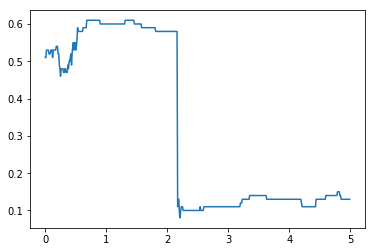

In [63]:
plt.plot(lam,acc)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.6704e+00 -6.0241e+01  2e+02  5e-01  3e+00  1e+00
 2: -6.5027e+00 -5.4341e+01  2e+02  4e-01  3e+00  9e-01
 3: -1.1748e+01 -3.9590e+01  1e+02  2e-01  2e+00  4e-01
 4: -1.4752e+01 -2.4977e+01  4e+01  8e-02  6e-01  1e-01
 5: -1.6235e+01 -1.9341e+01  1e+01  2e-02  2e-01  2e-02
 6: -1.6908e+01 -1.8314e+01  4e+00  1e-02  8e-02  1e-02
 7: -1.7221e+01 -1.7859e+01  2e+00  5e-03  3e-02  4e-03
 8: -1.7334e+01 -1.7628e+01  9e-01  2e-03  2e-02  1e-03
 9: -1.7418e+01 -1.7532e+01  3e-01  9e-04  6e-03  5e-04
10: -1.7451e+01 -1.7502e+01  1e-01  4e-04  3e-03  2e-04
11: -1.7466e+01 -1.7485e+01  6e-02  1e-04  1e-03  6e-05
12: -1.7468e+01 -1.7480e+01  4e-02  1e-04  6e-04  4e-05
13: -1.7471e+01 -1.7476e+01  2e-02  4e-05  3e-04  2e-05
14: -1.7472e+01 -1.7474e+01  7e-03  2e-05  1e-04  7e-06
15: -1.7472e+01 -1.7473e+01  2e-03  4e-06  3e-05  2e-06
16: -1.7472e+01 -1.7473e+01  4e-04  1e-06  8e-06  

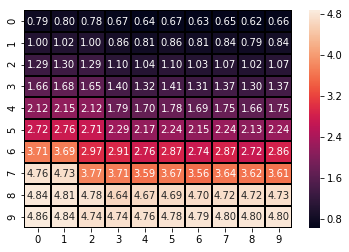

In [59]:
def acc1(lam):
    sen1 = irl(100,4, P,Pi_num,gamma, 1,lam)
    sen1=rf2grid(sen1)
    rewards = sen1
    Vi_a, Pi_a = policy_iteration(states, rewards, actions, gamma, epsilon)

    vgrid_a=np.zeros(shape=(10,10))
    for c in np.arange(10):
        for r in np.arange(10):
            vgrid_a[r, c] = Vi_a[r+c*10]

    pi_arrow = arrows(Pi_a)

    pgrid_a=np.chararray((10,10), itemsize=4)
    for c in np.arange(10):
        for r in np.arange(10):
            pgrid_a[r, c] = pi_arrow[r+c*10]
    ####
    ax1_a = sns.heatmap(vgrid_a, annot=True, fmt=".2f", linewidths=1, linecolor="black")
    ######
    
    #ax2_a = sns.heatmap(vgrid_a, annot=pgrid_a, fmt="s", linewidths=1, linecolor="black")

    ###
    m=np.zeros(shape=(10,10))
    for c in np.arange(10):
        for r in np.arange(10):
            if pgrid_a[r, c] == pgrid_e[r, c]:
                m[r, c] = 1

    Accuracy = np.count_nonzero(m)/(m.size * 1.0)
    print(Accuracy)
acc1(0.7)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8149e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.6704e+00 -6.0241e+01  2e+02  5e-01  3e+00  1e+00
 2: -6.5027e+00 -5.4341e+01  2e+02  4e-01  3e+00  9e-01
 3: -1.1748e+01 -3.9590e+01  1e+02  2e-01  2e+00  4e-01
 4: -1.4752e+01 -2.4977e+01  4e+01  8e-02  6e-01  1e-01
 5: -1.6235e+01 -1.9341e+01  1e+01  2e-02  2e-01  2e-02
 6: -1.6908e+01 -1.8314e+01  4e+00  1e-02  8e-02  1e-02
 7: -1.7221e+01 -1.7859e+01  2e+00  5e-03  3e-02  4e-03
 8: -1.7334e+01 -1.7628e+01  9e-01  2e-03  2e-02  1e-03
 9: -1.7418e+01 -1.7532e+01  3e-01  9e-04  6e-03  5e-04
10: -1.7451e+01 -1.7502e+01  1e-01  4e-04  3e-03  2e-04
11: -1.7466e+01 -1.7485e+01  6e-02  1e-04  1e-03  6e-05
12: -1.7468e+01 -1.7480e+01  4e-02  1e-04  6e-04  4e-05
13: -1.7471e+01 -1.7476e+01  2e-02  4e-05  3e-04  2e-05
14: -1.7472e+01 -1.7474e+01  7e-03  2e-05  1e-04  7e-06
15: -1.7472e+01 -1.7473e+01  2e-03  4e-06  3e-05  2e-06
16: -1.7472e+01 -1.7473e+01  4e-04  1e-06  8e-06  

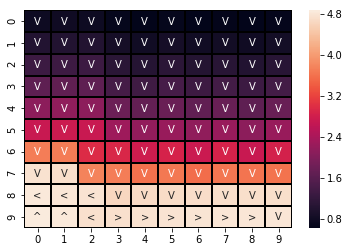

In [58]:
#when lambda =0.7
def acc1(lam):
    sen1 = irl(100,4, P,Pi_num,gamma, 1,lam)
    sen1=rf2grid(sen1)
    rewards = sen1
    Vi_a, Pi_a = policy_iteration(states, rewards, actions, gamma, epsilon)

    vgrid_a=np.zeros(shape=(10,10))
    for c in np.arange(10):
        for r in np.arange(10):
            vgrid_a[r, c] = Vi_a[r+c*10]

    pi_arrow = arrows(Pi_a)

    pgrid_a=np.chararray((10,10), itemsize=4)
    for c in np.arange(10):
        for r in np.arange(10):
            pgrid_a[r, c] = pi_arrow[r+c*10]
    ####
    #ax1_a = sns.heatmap(vgrid_a, annot=True, fmt=".2f", linewidths=1, linecolor="black")
    ######
    
    ax2_a = sns.heatmap(vgrid_a, annot=pgrid_a, fmt="s", linewidths=1, linecolor="black")

    ###
    m=np.zeros(shape=(10,10))
    for c in np.arange(10):
        for r in np.arange(10):
            if pgrid_a[r, c] == pgrid_e[r, c]:
                m[r, c] = 1

    Accuracy = np.count_nonzero(m)/(m.size * 1.0)
    print(Accuracy)
acc1(0.7)

In [19]:
# Test Cell

import random

U = {s: 0 for s in np.arange(20)}
print(U)
print(U[2])
print("---------------------------------------------------------")

actions = ["Move Up", "Move Down", "Move Right", "Move Left"]
print(actions[2])
a = random.choice(actions)
print(a)
p = tp(9,a)
k = p.keys()
print(p)
print(p.keys())
print(p[19])
print(k[0])
print("---------------------------------------------------------")

A = np.matrix([[1,2,3,33],[4,5,6,66],[7,8,9,99]])
print(A)
print(A[2:,:3])
print("---------------------------------------------------------")

arr = np.array([])
arr = np.append(arr, 1)
arr = np.append(arr, 4)
arr = np.append(arr, 3)
print(arr)
print(arr[2])
print(np.argmax(arr))
print(actions[np.argmax(arr)])
print("---------------------------------------------------------")


{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0}
0
---------------------------------------------------------
Move Right
Move Left
{8: 0.025, 9: 0.9500000000000001, 19: 0.025}
[8, 9, 19]
0.025
8
---------------------------------------------------------
[[ 1  2  3 33]
 [ 4  5  6 66]
 [ 7  8  9 99]]
[[7 8 9]]
---------------------------------------------------------
[ 1.  4.  3.]
3.0
1
Move Down
---------------------------------------------------------


In [20]:
">" == "> "

False